# Проект: Обучение с учителем: качество модели

# Интернет-магазин "В один клик"


Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. **Возможный выход — удерживать активность постоянных клиентов**. Сделать это можно с помощью персонализированных предложений.

«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 
<hr>

**Цель:** разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Задачи:**
1. Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
2. В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
3. Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.
 
**Этапы проекта:**
1. Изучить содержание таблиц
2. Предобработка данных - выявить:
 - Корректны ли названия столбцов
 - Корректность типов данных
 - Пропуски
 - Дубликаты
3. Исследовательский анализ
   - Исследовать доход от каждого покупателя за последние 3 месца
4. Объединение таблиц
5. Корреляционный анализ
6. Использование пайплайнов
7. Анализ важности признаков
8. Сегментация покупателей
9. Общий вывод
<hr>

**Описание данных**

**1. market_file.csv**

Таблица, которая содержит **данные о поведении покупателя на сайте**, о коммуникациях с покупателем и его продуктовом поведении.

- id — номер покупателя в корпоративной базе данных.
- Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
- Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
- Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
- Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
- Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.


**2. market_money.csv**

Таблица с **данными о выручке**, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- Выручка — сумма выручки за период.


**3. market_time.csv**

Таблица с **данными о времени (в минутах)**, которое покупатель провёл на сайте в течение периода.

- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксировано общее время.
- минут — значение времени, проведённого на сайте, в минутах.


**4. money.csv**

Таблица с данными **о среднемесячной прибыли покупателя за последние 3 месяца**: какую прибыль получает магазин от продаж каждому покупателю.

- id — номер покупателя в корпоративной базе данных.
- Прибыль — значение прибыли.

**Импорт библиотек**

In [1]:
!pip install phik
!pip install shap
!pip install mlxtend
!pip install -U scikit-learn

import pandas as pd
import numpy as np
import scipy as scipy
import seaborn as sns
import phik
import shap


#библиотеки для работы с графиками
import matplotlib.pyplot as plt 
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from itertools import combinations

#класс для разделения данных на выборки
from sklearn.model_selection import train_test_split

#модели
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#импорт класса дамми-модели 
from sklearn.dummy import DummyClassifier

#метод для отбора признаков модели
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#метрики
from phik.report import plot_correlation_matrix
from phik import phik_matrix
from sklearn.metrics import(
    confusion_matrix, 
    accuracy_score,
    f1_score,
    fbeta_score,
    roc_auc_score,
    ConfusionMatrixDisplay,
    recall_score,
    precision_score
)

#класс для оценки моделей на кросс-валидацию
from sklearn.model_selection import cross_val_score

# импортируем класс для поиска параметров
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#классы подготовки данных
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    LabelEncoder,
    StandardScaler,
    MinMaxScaler, 
)

# класс для работы с пропусками
from sklearn.impute import SimpleImputer 

#класс для работы с пайплайнами
from sklearn.pipeline import Pipeline

     |████████████████████████████████| 686 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 539 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 13.4 MB 76.4 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 67.8 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


**Указание констант**

In [2]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

## Исследование данных

### Открытие файлов

In [3]:
try:
    shopper_info = pd.read_csv('/datasets/market_file.csv', sep = ',', decimal = ',')
    revenue_info = pd.read_csv('/datasets/market_money.csv', sep = ',', decimal = ',')
    time_info = pd.read_csv('/datasets/market_time.csv', sep = ',', decimal = ',')
    gain_info = pd.read_csv('/datasets/money.csv', sep = ';', decimal = ',')
except:
    print('Ошибка открытия файлов')

### Таблица shopper_info

In [4]:
shopper_info.head(10)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.0,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,Снизилась,стандартт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
6,215354,Снизилась,стандартт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2
7,215355,Снизилась,стандартт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4
8,215356,Снизилась,стандартт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3
9,215357,Снизилась,стандартт,да,3.9,5,154,0.0,Техника для красоты и здоровья,3,3,9,5


In [5]:
shopper_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   id                                   1300 non-null   int64 
 1   Покупательская активность            1300 non-null   object
 2   Тип сервиса                          1300 non-null   object
 3   Разрешить сообщать                   1300 non-null   object
 4   Маркет_актив_6_мес                   1300 non-null   object
 5   Маркет_актив_тек_мес                 1300 non-null   int64 
 6   Длительность                         1300 non-null   int64 
 7   Акционные_покупки                    1300 non-null   object
 8   Популярная_категория                 1300 non-null   object
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64 
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64 
 11  Ошибка_сервиса                       1300 n

In [6]:
shopper_info.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.500000,375.421985,215348.0,215672.75,215997.5,216322.25,216647.0
Маркет_актив_тек_мес,1300.0,4.011538,0.696868,3.0,4.00,4.0,4.00,5.0
Длительность,1300.0,601.898462,249.856289,110.0,405.50,606.0,806.00,1079.0
Средний_просмотр_категорий_за_визит,1300.0,3.270000,1.355350,1.0,2.00,3.0,4.00,6.0
Неоплаченные_продукты_штук_квартал,1300.0,2.840000,1.971451,0.0,1.00,3.0,4.00,10.0
Ошибка_сервиса,1300.0,4.185385,1.955298,0.0,3.00,4.0,6.00,9.0
Страниц_за_визит,1300.0,8.176923,3.978126,1.0,5.00,8.0,11.00,20.0


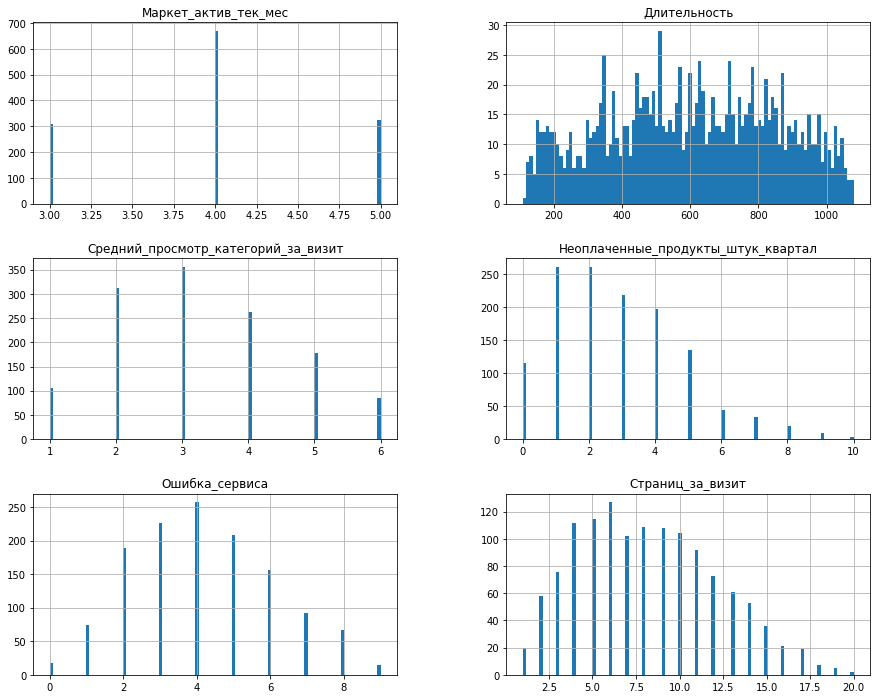

In [7]:
shop_hist = shopper_info.drop('id', axis = 1)
shop_hist.hist(bins = 100, figsize = (15, 12));

<hr>

**Вывод**

Пропусков в таблице не обнаружено. Названия столбцов следует перевести в змеиный регистр.

При рассмотрении распределения признаков, у всех данных среднее значение совпадает с медианой, что может говорить о нормальном распределении.

Несоответствие типов данных наблюдается у следующих столбцов:
- Перевести в числовой
 - Маркет_актив_6_мес
 - Акционные_покупки
- Перевести в категориальный
 - Маркет_актив_тек_мес:
  1. Меньше 4
  2. Больше 4
 
Замечены максимальные значения, значение которых сильно превышает цифры на остальных квартилях:
- Длительность(1079) - на графике значений от 1000 довольно много, поэтому оно не является аномалией или ошибкой ввода
- Неоплаченные_продукты_штук_квартал(10)
- Страниц_за_визит(20)

Остальные случаи рассмотрим на этапе исследовательского анализа.

<hr>

### Таблица revenue_info

In [8]:
revenue_info.head(10)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4
8,215350,предыдущий_месяц,5457.5
9,215351,текущий_месяц,6610.4


In [9]:
revenue_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       3900 non-null   int64 
 1   Период   3900 non-null   object
 2   Выручка  3900 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.5+ KB


<hr>

**Вывод**

Пропусков также нет, заголовки столбцов не соотвестсвуют нормам snake_case, несоответствие типа данных наблюдается у столбца "Выручка".

Отображение распределения данных на графике и описание таблицы выведем после изменения типа данных.

<hr>

### Таблица time_info

In [10]:
time_info.head(10)

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13
5,215350,предыдцщий_месяц,8
6,215351,текущий_месяц,13
7,215351,предыдцщий_месяц,11
8,215352,текущий_месяц,11
9,215352,предыдцщий_месяц,8


In [11]:
time_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [12]:
time_info.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2600.0,215997.500000,375.349754,215348.0,215672.75,215997.5,216322.25,216647.0
минут,2600.0,13.336154,4.080198,4.0,10.00,13.0,16.00,23.0


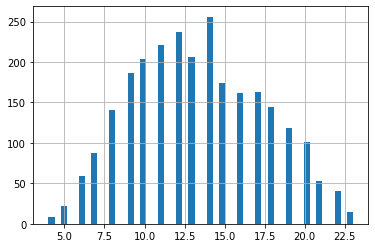

In [13]:
time_info['минут'].hist(bins = 50);

<hr>

**Вывод**

Проблема с заголовками, пропусков нет, типы данных соответствуют содержанию. Распределение минут на графике похоже на нормальное, среднее значение и медиана также не сильно отличаются.

<hr>

### Таблица gain_info

In [14]:
gain_info.head(10)

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
5,215353,3.95
6,215354,3.62
7,215355,5.26
8,215356,4.93
9,215357,4.66


In [15]:
gain_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [16]:
gain_info.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.500000,375.421985,215348.00,215672.75,215997.500,216322.25,216647.00
Прибыль,1300.0,3.996631,1.013722,0.86,3.30,4.045,4.67,7.43


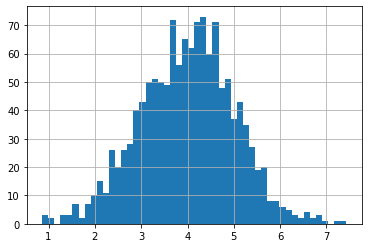

In [17]:
gain_info['Прибыль'].hist(bins = 50);

<hr>

**Вывод**

Пропусков нет, нужно исправить заголовки, типы данных соотвестсвуют содержанию. На графике видны выбросы на минимальных и максимальных значениях.

<hr>

## Предобработка данных

### Изменение заголовков таблиц

#### Приведение навзваний к нижнему регистру

In [18]:
shopper_info.columns = shopper_info.columns.str.lower()
revenue_info.columns = revenue_info.columns.str.lower()
time_info.columns = time_info.columns.str.lower()
gain_info.columns = gain_info.columns.str.lower()

#### Перевод названий на английский

##### Таблица shopper_info

In [19]:
shopper_info = shopper_info.rename(columns = {
    'покупательская активность':'customer_activity',
    'тип сервиса':'type_of_service', 
    'разрешить сообщать':'allow_reporting',
    'маркет_актив_6_мес':'market_active_six_months',
    'маркет_актив_тек_мес':'market_activ_this_months',
    'длительность':'duration',
    'акционные_покупки':'promotional_purchases',
    'популярная_категория':'popular_category',
    'средний_просмотр_категорий_за_визит':'average_view_category_visit',
    'неоплаченные_продукты_штук_квартал':'unpaid_product_stack_quart',
    'ошибка_сервиса':'service_error',
    'страниц_за_визит':'page_visit'
})

shopper_info.columns

Index(['id', 'customer_activity', 'type_of_service', 'allow_reporting',
       'market_active_six_months', 'market_activ_this_months', 'duration',
       'promotional_purchases', 'popular_category',
       'average_view_category_visit', 'unpaid_product_stack_quart',
       'service_error', 'page_visit'],
      dtype='object')

##### Таблица revenue_info

In [20]:
revenue_info = revenue_info.rename(columns = {
    'период':'period',
    'выручка':'revenue'
})
revenue_info.columns

Index(['id', 'period', 'revenue'], dtype='object')

##### Таблица time_info

In [21]:
time_info = time_info.rename(columns = {
    'период':'period',
    'минут':'minutes'
})
time_info.columns

Index(['id', 'period', 'minutes'], dtype='object')

##### Таблица gain_info

In [22]:
gain_info = gain_info.rename(columns = {'прибыль':'gain'})
gain_info.columns

Index(['id', 'gain'], dtype='object')

### Изменение типов данных

#### Таблица shopper_info

In [23]:
shopper_info['market_active_six_months'] = pd.to_numeric(shopper_info['market_active_six_months'], errors = 'coerce')
shopper_info['promotional_purchases'] = pd.to_numeric(shopper_info['promotional_purchases'], errors = 'coerce')
shopper_info['market_activ_this_months'] = shopper_info['market_activ_this_months'].apply(
    lambda x: 'меньше 4' if x < 4 else 'больше 4'
)
shopper_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           1300 non-null   int64  
 1   customer_activity            1300 non-null   object 
 2   type_of_service              1300 non-null   object 
 3   allow_reporting              1300 non-null   object 
 4   market_active_six_months     1300 non-null   float64
 5   market_activ_this_months     1300 non-null   object 
 6   duration                     1300 non-null   int64  
 7   promotional_purchases        1300 non-null   float64
 8   popular_category             1300 non-null   object 
 9   average_view_category_visit  1300 non-null   int64  
 10  unpaid_product_stack_quart   1300 non-null   int64  
 11  service_error                1300 non-null   int64  
 12  page_visit                   1300 non-null   int64  
dtypes: float64(2), int

#### Таблица revenue_info

In [24]:
revenue_info['revenue'] = pd.to_numeric(revenue_info['revenue'], errors = 'coerce')
revenue_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   period   3900 non-null   object 
 2   revenue  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


### Поиск дубликатов

#### Явные дубликаты

In [25]:
print(f'Сумма дубликатов в таблице shopper_info {shopper_info.duplicated().sum()}')
print(f'Сумма дубликатов в таблице revenue_info {revenue_info.duplicated().sum()}')
print(f'Сумма дубликатов в таблице time_info {time_info.duplicated().sum()}')
print(f'Сумма дубликатов в таблице gain_info {gain_info.duplicated().sum()}')

Сумма дубликатов в таблице shopper_info 0
Сумма дубликатов в таблице revenue_info 0
Сумма дубликатов в таблице time_info 0
Сумма дубликатов в таблице gain_info 0


#### Неявные дубликаты

##### Таблица shopper_info

In [26]:
shopper_info['customer_activity'].unique()

array(['Снизилась', 'Прежний уровень'], dtype=object)

In [27]:
shopper_info['type_of_service'].unique()

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

In [28]:
shopper_info['type_of_service'] = shopper_info['type_of_service'].replace('стандартт', 'стандарт')
shopper_info['type_of_service'].unique()

array(['премиум', 'стандарт'], dtype=object)

In [29]:
shopper_info['allow_reporting'].unique()

array(['да', 'нет'], dtype=object)

In [30]:
shopper_info['market_activ_this_months'].unique()

array(['больше 4', 'меньше 4'], dtype=object)

In [31]:
shopper_info['popular_category'].unique()

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

##### Таблица revenue_info

In [32]:
revenue_info['period'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

##### Таблица time_info

In [33]:
time_info['period'] = time_info['period'].replace('предыдцщий_месяц', 'предыдущий_месяц')
time_info['period'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

<hr>

**Вывод** По итогу раздела:

1. Изменены названия заголовков
2. Изменены типы данных
3. Количество явных дубликатов во всех таблицах составило 0 записей
4. Найдены и исправлены неявные дубликаты

<hr>

## Исследовательский анализ

### Категориальные признаки

#### Таблица shopper_info

Категориальные признаки: customer_activity(целевой), type_of_service, allow_reporting, popular_category

##### Пользовательская активность

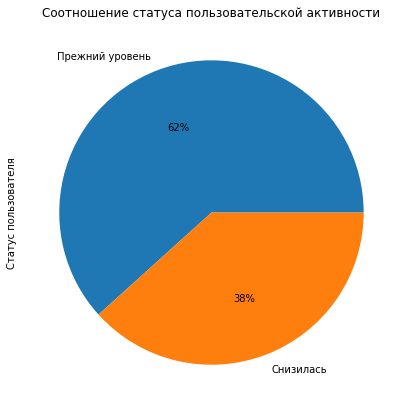

In [34]:
shopper_info['customer_activity'].value_counts().plot(
    kind = 'pie',
    figsize = (7, 7),
    autopct = '%0.f%%',
    title = 'Соотношение статуса пользовательской активности'
)
plt.ylabel('Статус пользователя');

In [35]:
shopper_info['customer_activity'].value_counts()

Прежний уровень    802
Снизилась          498
Name: customer_activity, dtype: int64

Наблюдается дисбаланс классов в целевой переменной. Соотношение классов - обьектов мажорного класса больше почти в 2(1.6) раза. Т.к. записей в таблице не много, то бороться с дисбалансом будем встроенными средствами моделей class_weights 

##### Тип сервиса

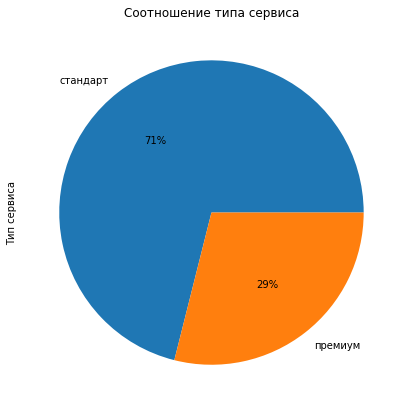

In [36]:
shopper_info['type_of_service'].value_counts().plot(
    kind = 'pie',
    figsize = (7, 7),
    autopct = '%0.f%%',
    title = 'Соотношение типа сервиса'
)
plt.ylabel('Тип сервиса');

##### Количество маркетинговых коммуникаций в текущем месяце

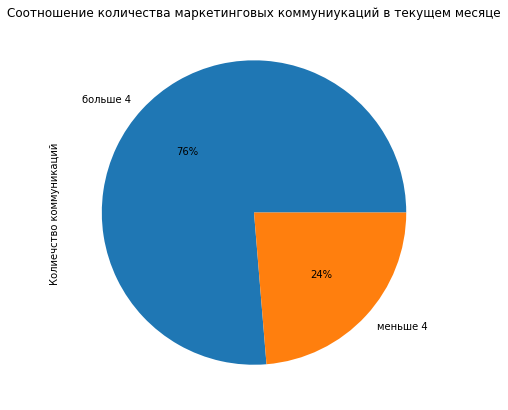

In [37]:
shopper_info['market_activ_this_months'].value_counts().plot(
    kind = 'pie',
    figsize = (7, 7),
    autopct = '%0.f%%',
    title = 'Соотношение количества маркетинговых коммуниукаций в текущем месяце'
)
plt.ylabel('Колиечство коммуникаций');

##### Разрешение присылать сообщения

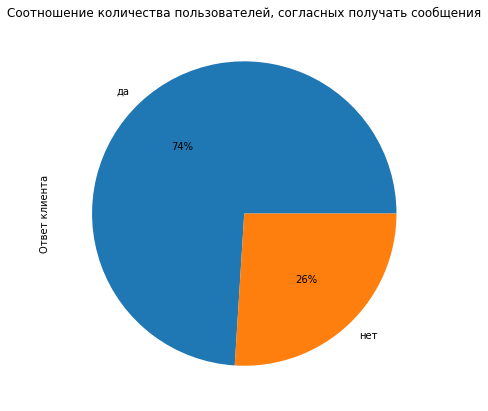

In [38]:
shopper_info['allow_reporting'].value_counts().plot(
    kind = 'pie',
    figsize = (7, 7),
    autopct = '%0.f%%',
    title = 'Соотношение количества пользователей, согласных получать сообщения'
)
plt.ylabel('Ответ клиента');

##### Популярная категория

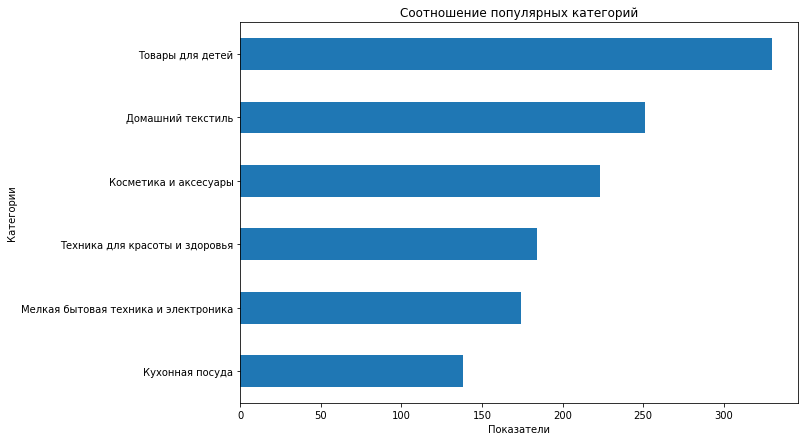

In [39]:
shopper_info['popular_category'].value_counts().sort_values(ascending = True).plot(
    kind = 'barh',
    figsize = (10, 7),
    title = 'Соотношение популярных категорий'
)
plt.xlabel('Показатели')
plt.ylabel('Категории');

#### Таблица revenue_info

Категориальные признаки: period

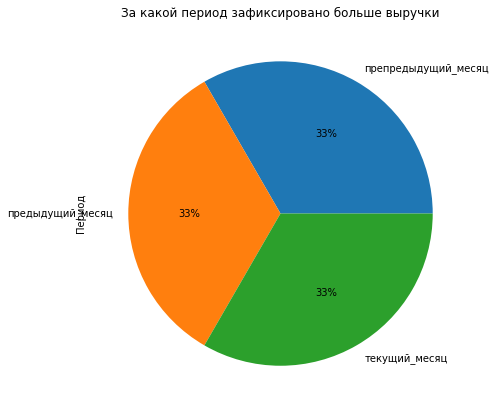

In [40]:
revenue_info['period'].value_counts().plot(
    kind = 'pie',
    figsize = (7, 7),
    autopct = '%0.f%%',
    title = 'За какой период зафиксировано больше выручки'
)
plt.ylabel('Период');

#### Таблица time_info

Категориальные признаки: period

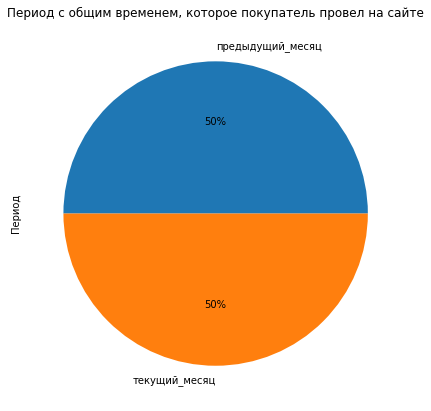

In [41]:
time_info['period'].value_counts().plot(
    kind = 'pie',
    figsize = (7, 7),
    autopct = '%0.f%%',
    title = 'Период с общим временем, которое покупатель провел на сайте'
)
plt.ylabel('Период');

**Вывод**

Информация о поведении пользователей
 - У большинства пользователей остался прежний уровень активности
 - Преобладающий тип сервиса - стандарт
 - В текущем месяце преобладает категория количества маркетинговых коммуникаций - больше 4
 - Больше половины пользователей согласны получать дополнительные сообщения от магазина
 - Наиболее популярные категории товаров:
  1. Товары для детей
  2. Домашний текстиль
  3. Косметика и аксесуары
  
Информация о выручке: рано делать выводы. Сейчас шел подсчет количества значений в столбце со строковыми значениями, поэтому итоговый вывод лучше сделать после проверки числового столбца на выбросы и аномальные значения.

Информация о времени, которые пользователи провели на сайте: Также сделаем итоговый вывод после изучения столбца с числовыми данными.

### Количественные признаки

#### Таблица shopper_info

Количественные признаки: market_active_six_months, market_activ_this_months, duration, promotional_purchases, average_view_category_visit, unpaid_product_stack_quart, service_error, page_visit

##### Среднемесячное количество маркетинговых коммуникаций

Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента за последние 6 месяцев.

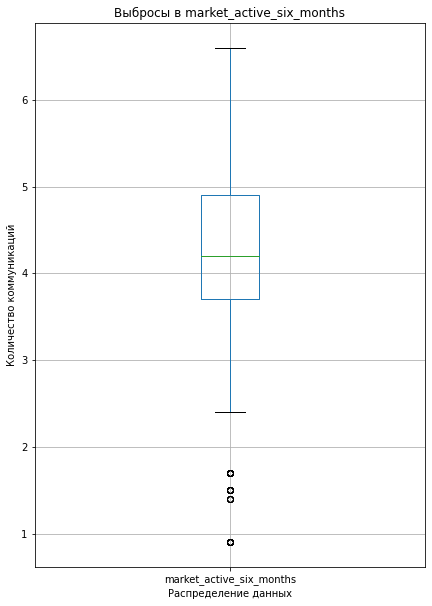

In [42]:
shopper_info.boxplot(column = 'market_active_six_months', figsize = (7, 10))
plt.title('Выбросы в market_active_six_months')
plt.xlabel('Распределение данных')
plt.ylabel('Количество коммуникаций');

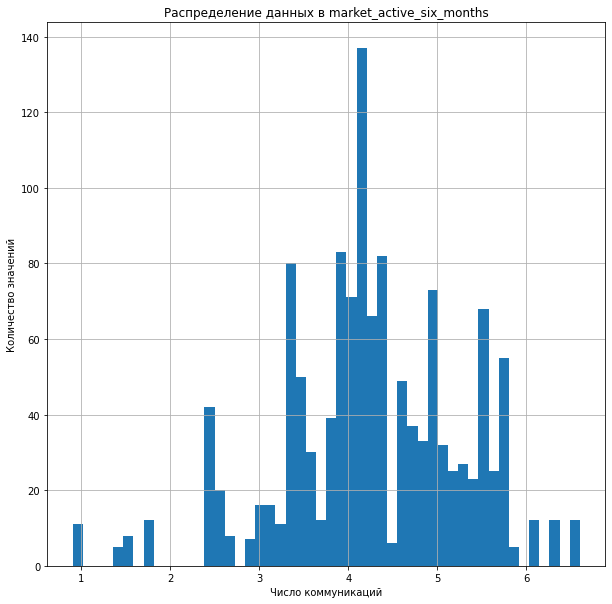

In [43]:
shopper_info['market_active_six_months'].hist(bins = 50, figsize = (10, 10))
plt.title('Распределение данных в market_active_six_months')
plt.xlabel('Число коммуникаций')
plt.ylabel('Количество значений');

In [44]:
shopper_info['market_active_six_months'].describe()

count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: market_active_six_months, dtype: float64

Пик значений смещен вправо от центра на 0,05, большинство данных расположено в диапазоне от 2,5 до 6. Сильного разброса значений и аномалий не наблюдается.

##### Количество дней с момента регистрации пользователей

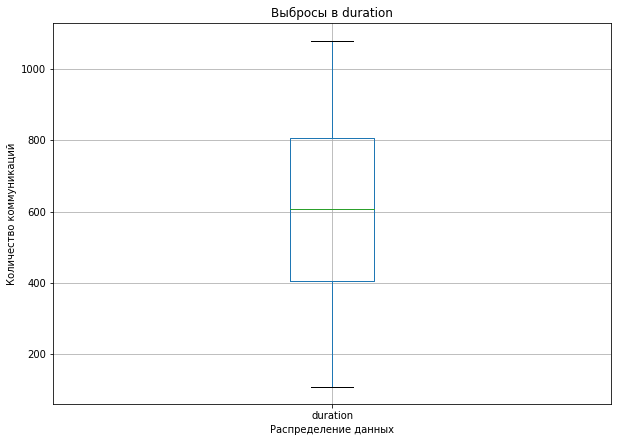

In [45]:
shopper_info.boxplot(column = 'duration', figsize = (10, 7))
plt.title('Выбросы в duration')
plt.xlabel('Распределение данных')
plt.ylabel('Количество коммуникаций');

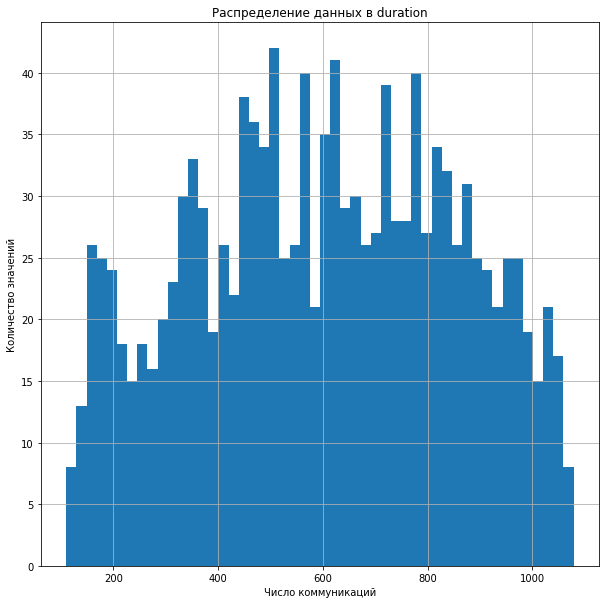

In [46]:
shopper_info['duration'].hist(bins = 50, figsize = (10, 10))
plt.title('Распределение данных в duration')
plt.xlabel('Число коммуникаций')
plt.ylabel('Количество значений');

In [47]:
shopper_info['duration'].describe()

count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: duration, dtype: float64

Смещение у данных минимальное, выбросов нет.

##### Среднемесячная доля от покупок по акции

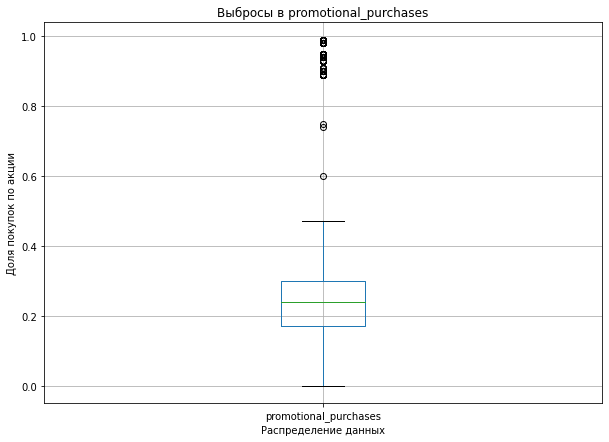

In [48]:
shopper_info.boxplot(column = 'promotional_purchases', figsize = (10, 7))
plt.title('Выбросы в promotional_purchases')
plt.xlabel('Распределение данных')
plt.ylabel('Доля покупок по акции');

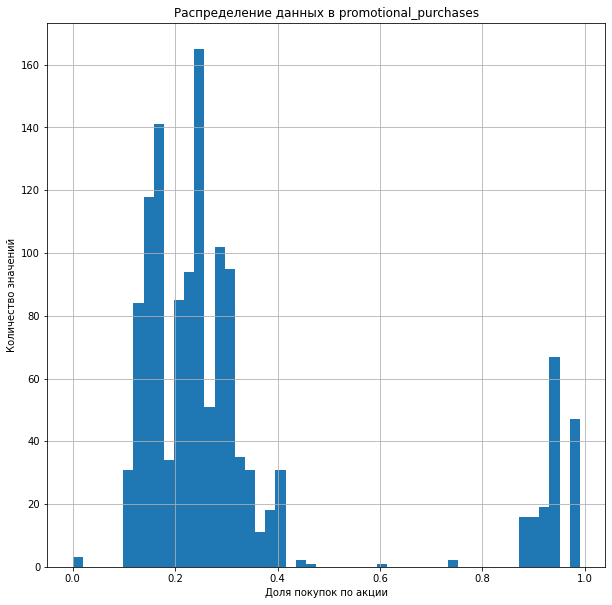

In [49]:
shopper_info['promotional_purchases'].hist(bins = 50, figsize = (10, 10))
plt.title('Распределение данных в promotional_purchases')
plt.xlabel('Доля покупок по акции')
plt.ylabel('Количество значений');

In [50]:
shopper_info['promotional_purchases'].describe()

count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: promotional_purchases, dtype: float64

На диаграмме наблюдается скопление выбросов в промежутке от 0,9 до 1. Также на графике наблюдается 2 пика значений. Оставим выбросы, т.к. они составляют немалую часть данных. 

##### Среднее количество просматриваемых категорий за визит
показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.

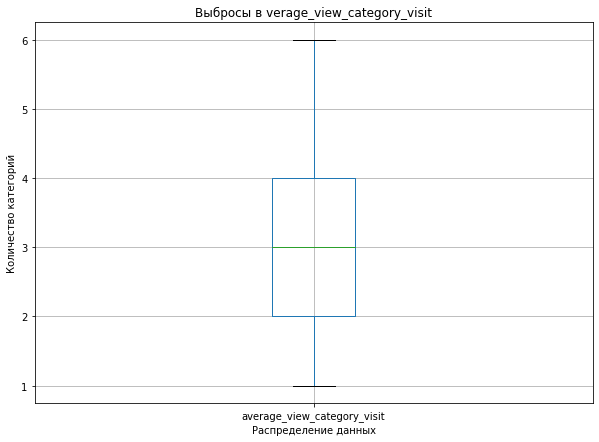

In [51]:
shopper_info.boxplot(column = 'average_view_category_visit', figsize = (10, 7))
plt.title('Выбросы в verage_view_category_visit')
plt.xlabel('Распределение данных')
plt.ylabel('Количество категорий');

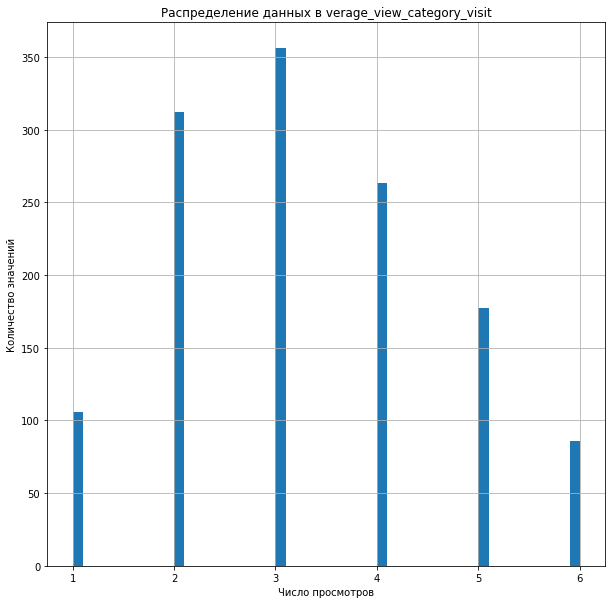

In [52]:
shopper_info['average_view_category_visit'].hist(bins = 50, figsize = (10, 10))
plt.title('Распределение данных в verage_view_category_visit')
plt.xlabel('Число просмотров')
plt.ylabel('Количество значений');

In [53]:
shopper_info['average_view_category_visit'].describe()

count    1300.00000
mean        3.27000
std         1.35535
min         1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max         6.00000
Name: average_view_category_visit, dtype: float64

Выбросов нет, распределение данных нормальное.

##### Количество неоплаченных товаров в корзине

общее число неоплаченных товаров в корзине за последние 3 месяца.

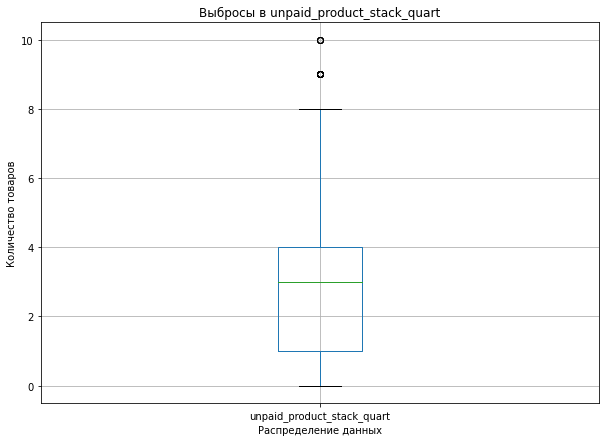

In [54]:
shopper_info.boxplot(column = 'unpaid_product_stack_quart', figsize = (10, 7))
plt.title('Выбросы в unpaid_product_stack_quart')
plt.xlabel('Распределение данных')
plt.ylabel('Количество товаров');

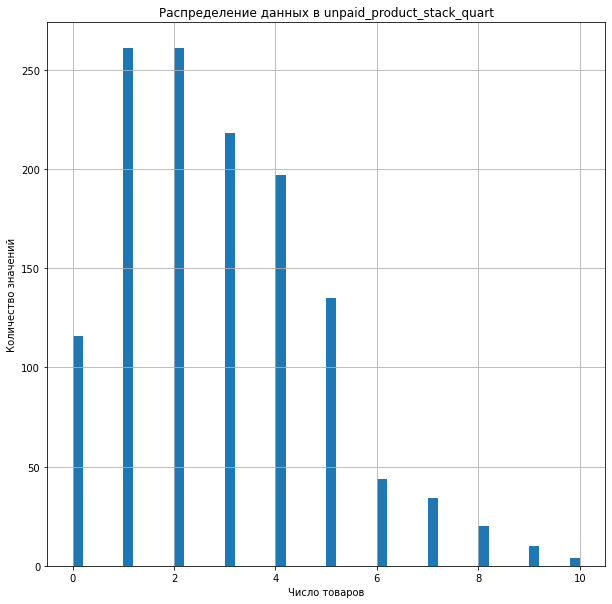

In [55]:
shopper_info['unpaid_product_stack_quart'].hist(bins = 50, figsize = (10, 10))
plt.title('Распределение данных в unpaid_product_stack_quart')
plt.xlabel('Число товаров')
plt.ylabel('Количество значений');

In [56]:
shopper_info['unpaid_product_stack_quart'].describe()

count    1300.000000
mean        2.840000
std         1.971451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: unpaid_product_stack_quart, dtype: float64

Можно предположить, что выбросы на диграмме это аномальные значения, резко отличающиеся от остлаьных. Также наблюдается большое смещение как на диаграмме, так и на графике. Уберем значения больше 8.

##### Число сбоев

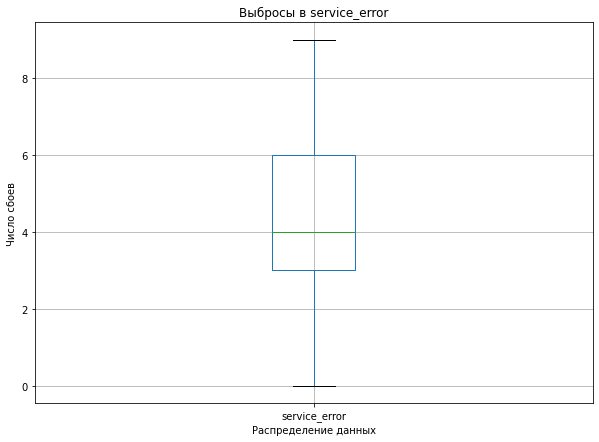

In [57]:
shopper_info.boxplot(column = 'service_error', figsize = (10, 7))
plt.title('Выбросы в service_error')
plt.xlabel('Распределение данных')
plt.ylabel('Число сбоев');

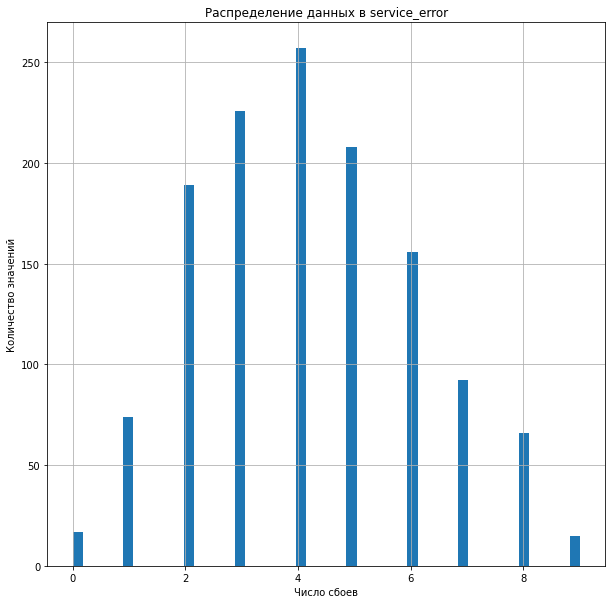

In [58]:
shopper_info['service_error'].hist(bins = 50, figsize = (10, 10))
plt.title('Распределение данных в service_error')
plt.xlabel('Число сбоев')
plt.ylabel('Количество значений');

In [59]:
shopper_info['service_error'].describe()

count    1300.000000
mean        4.185385
std         1.955298
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: service_error, dtype: float64

Распределение данных нормальное, смещения на графиках и в описании таблицы не наблюдается, выбросов нет.

##### Среднее количество посещенных страниц за один визит

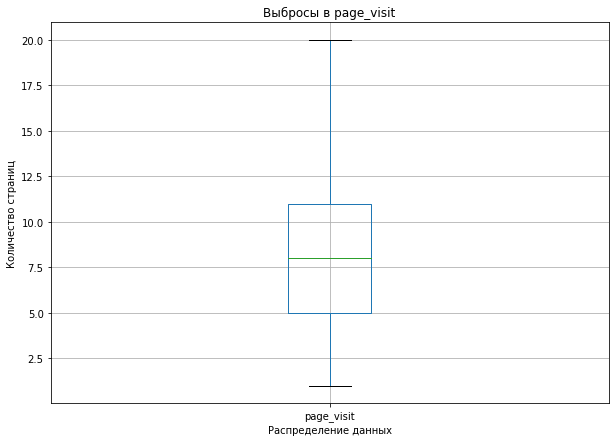

In [60]:
shopper_info.boxplot(column = 'page_visit', figsize = (10, 7))
plt.title('Выбросы в page_visit')
plt.xlabel('Распределение данных')
plt.ylabel('Количество страниц');

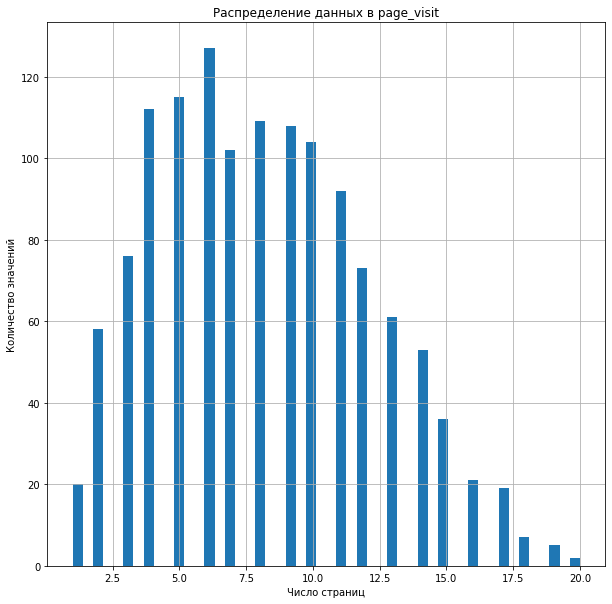

In [61]:
shopper_info['page_visit'].hist(bins = 50, figsize = (10, 10))
plt.title('Распределение данных в page_visit')
plt.xlabel('Число страниц')
plt.ylabel('Количество значений');

In [62]:
shopper_info['page_visit'].describe()

count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: page_visit, dtype: float64

Наблюдается смещение пика значений от центра влево, общая картина распределения напоминает колокол, выбросов нет, аномальных значений нет.

#### Таблица revenue_info

Количественные признаки: revenue

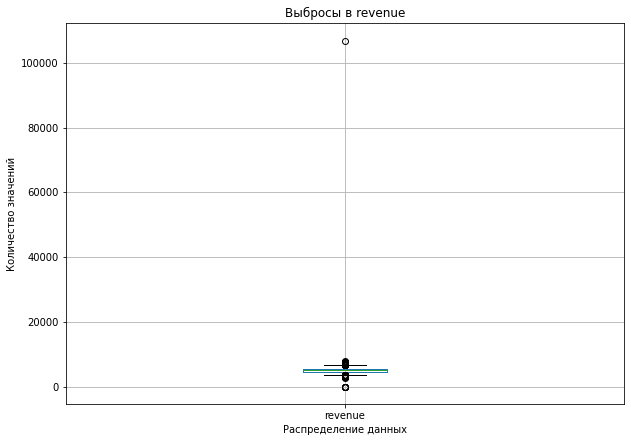

In [63]:
revenue_info.boxplot(column = 'revenue', figsize = (10, 7))
plt.title('Выбросы в revenue')
plt.xlabel('Распределение данных')
plt.ylabel('Количество значений');

Аномальное значение больше 100 000 - остальные показатели расположены в диапазоне от 0 до 10 000. Также можно удалить выброс со значением 0, т.к. в таблице с информацией о прибыли за определенный период такая запись несет минимум информации.

In [64]:
revenue_info.head()

,id,period,revenue
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


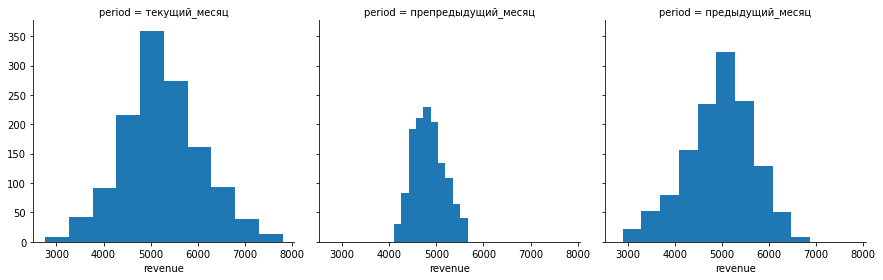

In [65]:
revenue_info = revenue_info.query('0 < revenue < 100000')
#revenue_info.groupby('period')['revenue'].hist(bins = 50, figsize = (10, 10))

g = sns.FacetGrid(revenue_info, col = 'period', col_wrap=10, height=4)
g = (g.map(plt.hist, "revenue"));


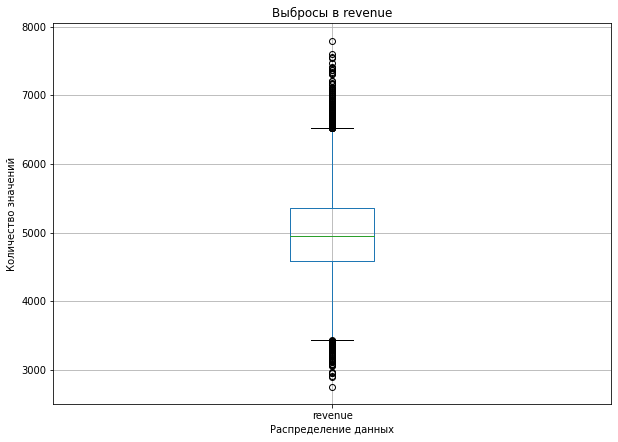

In [66]:
revenue_info.boxplot(column = 'revenue', figsize = (10, 7))
plt.title('Выбросы в revenue')
plt.xlabel('Распределение данных')
plt.ylabel('Количество значений');

In [67]:
revenue_info['revenue'].describe()

count    3893.000000
mean     5007.282918
std       679.724898
min      2758.700000
25%      4592.000000
50%      4959.000000
75%      5363.000000
max      7799.400000
Name: revenue, dtype: float64

In [68]:
revenue_info.groupby('period').agg({'revenue':'sum'})

,revenue
period,
предыдущий_месяц,6417996.5
препредыдущий_месяц,6272769.0
текущий_месяц,6802586.9


Прибыль в каждом месяце почти одинаковая, но теперь можно утверждать, что большую прибыль магазин получил в текущем месяце.

#### Таблица time_info

Количественные признаки: minutes

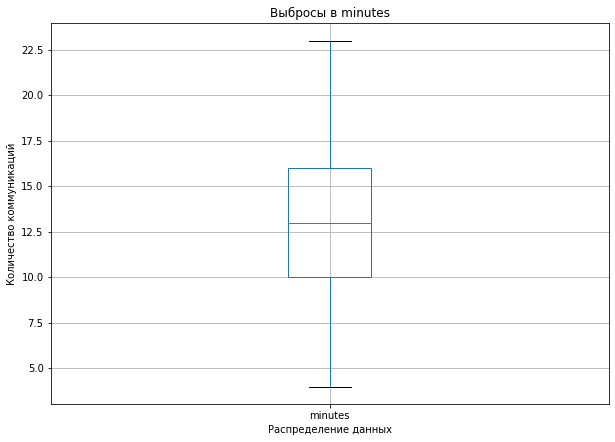

In [69]:
time_info.boxplot(column = 'minutes', figsize = (10, 7))
plt.title('Выбросы в minutes')
plt.xlabel('Распределение данных')
plt.ylabel('Количество коммуникаций');

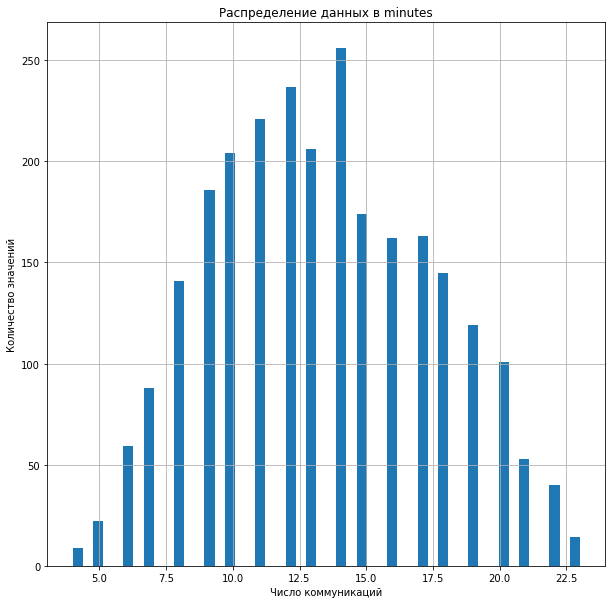

In [70]:
time_info['minutes'].hist(bins = 50, figsize = (10, 10))
plt.title('Распределение данных в minutes')
plt.xlabel('Число коммуникаций')
plt.ylabel('Количество значений');

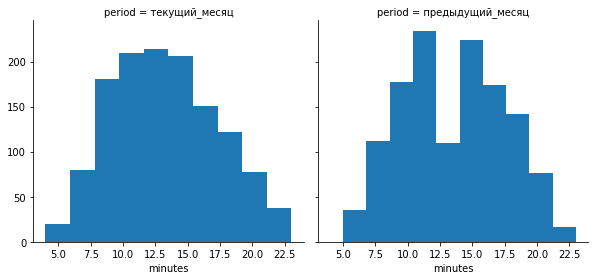

In [71]:
g = sns.FacetGrid(time_info, col = 'period', col_wrap=10, height=4)
g = (g.map(plt.hist, "minutes"))

In [72]:
time_info['minutes'].describe()

count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: minutes, dtype: float64

In [73]:
time_info.groupby('period').agg({'minutes':'sum'})

,minutes
period,
предыдущий_месяц,17508
текущий_месяц,17166


#### Таблица gain_info

Количественные признаки: gain

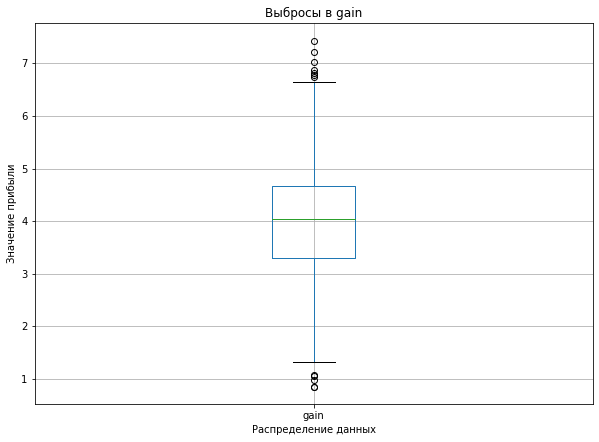

In [74]:
gain_info.boxplot(column = 'gain', figsize = (10, 7))
plt.title('Выбросы в gain')
plt.xlabel('Распределение данных')
plt.ylabel('Значение прибыли');

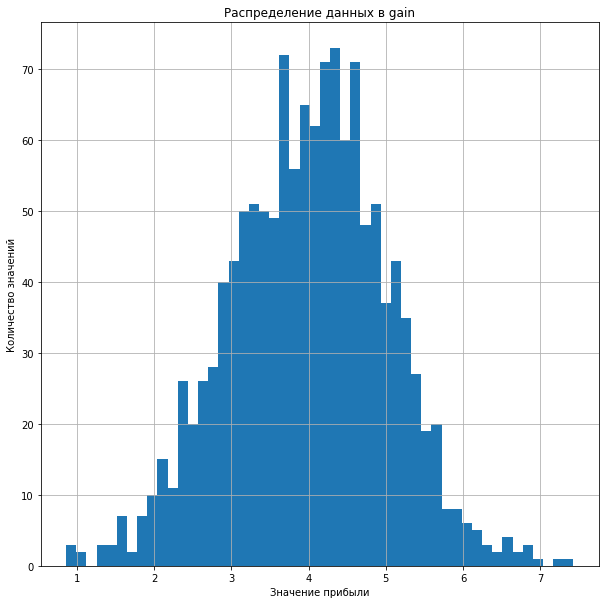

In [75]:
gain_info['gain'].hist(bins = 50, figsize = (10, 10))
plt.title('Распределение данных в gain')
plt.xlabel('Значение прибыли')
plt.ylabel('Количество значений');

In [76]:
gain_info['gain'].describe()

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: gain, dtype: float64

Аномаьных значений нет, распределение данных нормальное.

### Клиенты с активностью не менее 3 месяцев

Отбор клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. 

In [77]:
activity = shopper_info.merge(gain_info, on = 'id', how = 'inner')
activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           1300 non-null   int64  
 1   customer_activity            1300 non-null   object 
 2   type_of_service              1300 non-null   object 
 3   allow_reporting              1300 non-null   object 
 4   market_active_six_months     1300 non-null   float64
 5   market_activ_this_months     1300 non-null   object 
 6   duration                     1300 non-null   int64  
 7   promotional_purchases        1300 non-null   float64
 8   popular_category             1300 non-null   object 
 9   average_view_category_visit  1300 non-null   int64  
 10  unpaid_product_stack_quart   1300 non-null   int64  
 11  service_error                1300 non-null   int64  
 12  page_visit                   1300 non-null   int64  
 13  gain              

In [78]:
print(f'Общий показатель прибыли за 3 месяца {activity["gain"].sum()}')

Общий показатель прибыли за 3 месяца 5195.62


In [79]:
print('Общая прибыль от покупателей с из разных групп активности')
activity.groupby('customer_activity')['gain'].sum()

Общая прибыль от покупателей с из разных групп активности


customer_activity
Прежний уровень    3204.45
Снизилась          1991.17
Name: gain, dtype: float64

In [80]:
print('Общая прибыль от покупателей из разных групп по типу подписки')
activity.groupby('type_of_service')['gain'].sum()

Общая прибыль от покупателей из разных групп по типу подписки


type_of_service
премиум     1492.27
стандарт    3703.35
Name: gain, dtype: float64

In [81]:
revenue_pivot = revenue_info.pivot_table(
    index = 'id',
    columns = 'period',
    values = 'revenue',
    aggfunc = 'sum'
)
display(revenue_pivot.head())
display(revenue_pivot.info())

period,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
id,,,
215348,NaN,NaN,3293.1
215349,5216.0,4472.0,4971.6
215350,5457.5,4826.0,5058.4
215351,6158.0,4793.0,6610.4
215352,5807.5,4594.0,5872.5


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 215348 to 216647
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   предыдущий_месяц     1297 non-null   float64
 1   препредыдущий_месяц  1297 non-null   float64
 2   текущий_месяц        1299 non-null   float64
dtypes: float64(3)
memory usage: 40.6 KB


None

Посмотрим количество покупателей, которые ничего не покупали в течении 3-х месяцев

In [82]:
null = revenue_pivot.isnull().any(axis = 1)
display(revenue_pivot[null])
print(f'Покупатели с непостоянной активностью: {null.sum()}')

period,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
id,,,
215348,NaN,NaN,3293.1
215357,NaN,NaN,5986.3
215359,NaN,NaN,4735.0
215380,6077.0,5051.0,NaN


Покупатели с непостоянной активностью: 4


Удалим данных покупателей из таблицы

In [83]:
revenue_pivot = revenue_pivot.dropna()
display(revenue_pivot.head())
display(revenue_pivot.info())

period,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
id,,,
215349,5216.0,4472.0,4971.6
215350,5457.5,4826.0,5058.4
215351,6158.0,4793.0,6610.4
215352,5807.5,4594.0,5872.5
215353,4738.5,5124.0,5388.5


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 215349 to 216647
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   предыдущий_месяц     1296 non-null   float64
 1   препредыдущий_месяц  1296 non-null   float64
 2   текущий_месяц        1296 non-null   float64
dtypes: float64(3)
memory usage: 40.5 KB


None

## Объединение таблиц 

### Создание новых столбцов

In [84]:
time_pivot = time_info.pivot_table(
    index = 'id',
    columns = 'period',
    values = 'minutes',
    aggfunc = 'sum'
)
display(time_pivot.head(10))
display(time_pivot.info())

period,предыдущий_месяц,текущий_месяц
id,,
215348,13,14
215349,12,10
215350,8,13
215351,11,13
215352,8,11
215353,10,10
215354,11,12
215355,12,10
215356,6,7


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 215348 to 216647
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   предыдущий_месяц  1300 non-null   int64
 1   текущий_месяц     1300 non-null   int64
dtypes: int64(2)
memory usage: 30.5 KB


None

### Обьединение таблиц shopper_info, revenue_info, time_info

In [85]:
shopper_new = shopper_info.merge(revenue_pivot, on = 'id')
shopper_new = shopper_new.merge(time_pivot, on = 'id')
display(shopper_new.info())
display(shopper_new.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           1296 non-null   int64  
 1   customer_activity            1296 non-null   object 
 2   type_of_service              1296 non-null   object 
 3   allow_reporting              1296 non-null   object 
 4   market_active_six_months     1296 non-null   float64
 5   market_activ_this_months     1296 non-null   object 
 6   duration                     1296 non-null   int64  
 7   promotional_purchases        1296 non-null   float64
 8   popular_category             1296 non-null   object 
 9   average_view_category_visit  1296 non-null   int64  
 10  unpaid_product_stack_quart   1296 non-null   int64  
 11  service_error                1296 non-null   int64  
 12  page_visit                   1296 non-null   int64  
 13  предыдущий_месяц_x

None

,id,customer_activity,type_of_service,allow_reporting,market_active_six_months,market_activ_this_months,duration,promotional_purchases,popular_category,average_view_category_visit,unpaid_product_stack_quart,service_error,page_visit,предыдущий_месяц_x,препредыдущий_месяц,текущий_месяц_x,предыдущий_месяц_y,текущий_месяц_y
0,215349,Снизилась,премиум,да,4.4,больше 4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,меньше 4,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,больше 4,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,меньше 4,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,больше 4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


Новые столбцы с выручкой обозначены именами с "х" на конце, с "у" - столбцы с минутами.

## Корреляционный анализ

Перед построением матрицы корреляции уберем из датасета признаки, не влияющие на целевой:
- id
- duration - учет общего времени с момента регистрации не влияют на активность покупателя на сайте

In [86]:
shopper_new1 = shopper_new.drop(['id', 'duration'], axis = 1)

Построим матрицу корреляции и посмотрим на коэффициенты корреляции у числовых признаков.

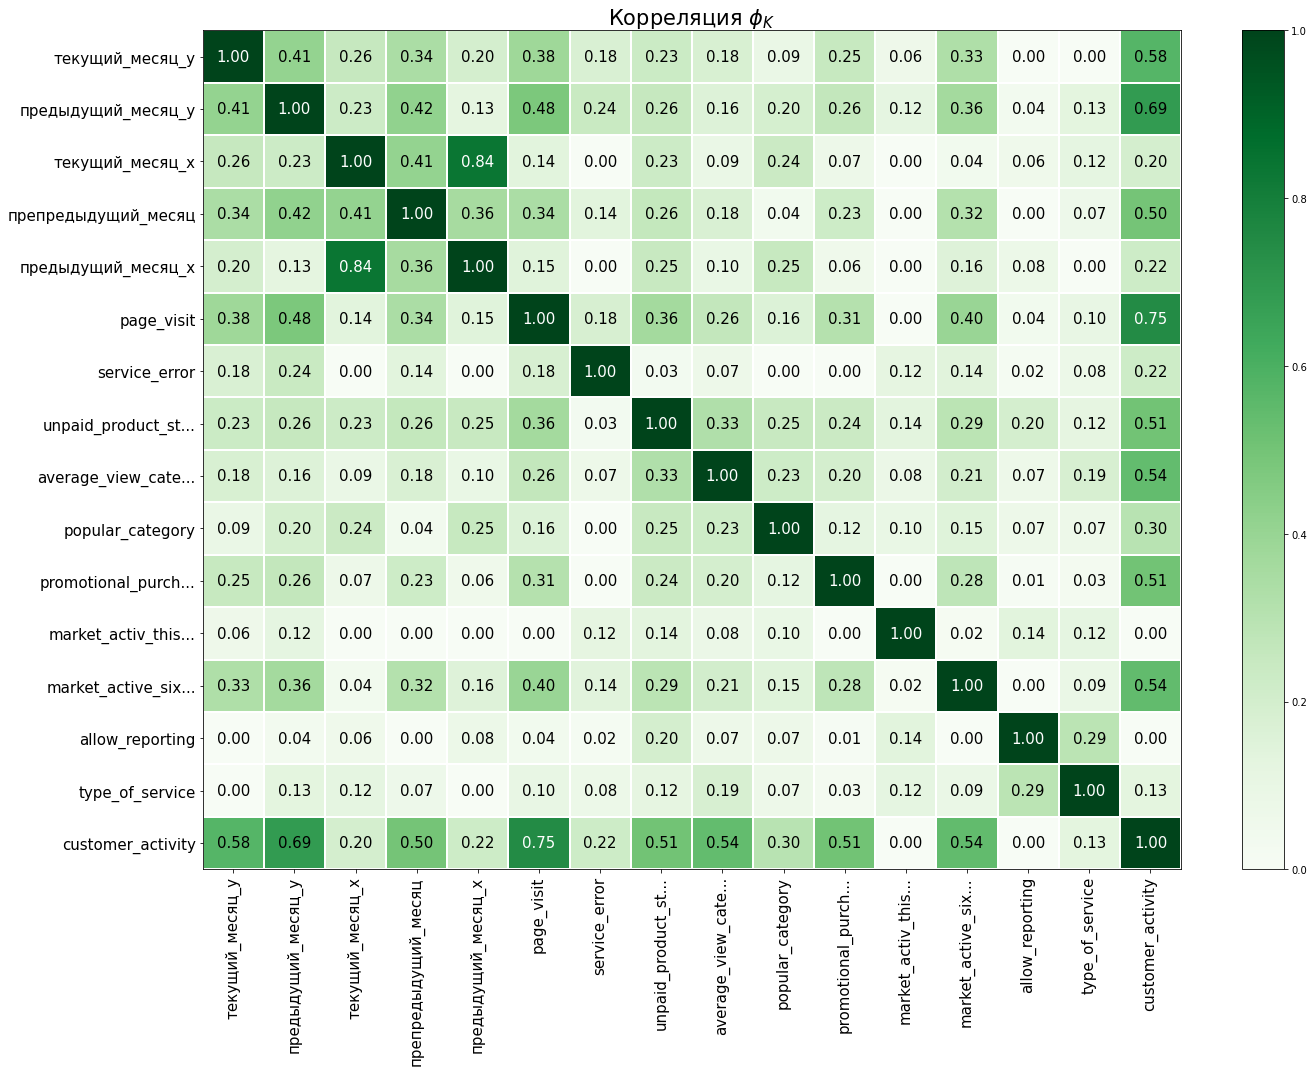

In [87]:
phik_matr = (shopper_new1.phik_matrix(verbose=False))

plot_correlation_matrix(
    phik_matr.values,
    x_labels=phik_matr.columns,
    y_labels=phik_matr.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'Корреляция $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

Большее влияние на целевой признак **customer_activity**, по сравнению с остальными показателями, имеют следующие признаки:
- Малое(0.5 - 0.6) - average_view_category, promotional_purchases, market_active_six_months, текущий_месяц_у(минуты в текущем месяце), выручка в препредыдущем месяце.
- Умеренное(0.6 - 0.7) - предыдущий_месяц_у(минуты в предыдущем месяце)
- Заметное(0.7+) - page_visit

Также заметная взаимосвязь наблюдается только у признаков с выручкой за предыдущий и текущий месяц. Стоит посмотреть взаимосвязь этих признаков отдельно. 

Мультиколлинеарности между признаками не наблюдается, т.к. нет показателей 0.9+

### Связь между признаками

Рассмотрим взаимосвязь между признаками с выручкой за текущий и предыдущий месяц. Целевой признак возьмем в качетсве цвета точек на графике.

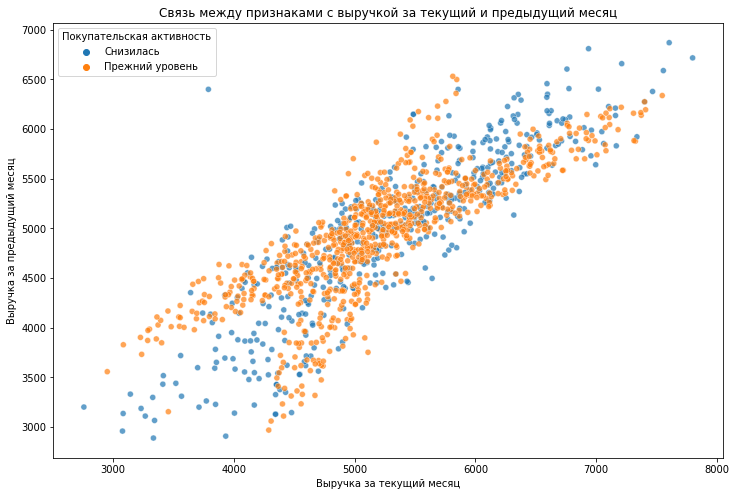

In [88]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(
    x = 'текущий_месяц_x',
    y = 'предыдущий_месяц_x',
    hue = 'customer_activity',
    data = shopper_new1,
    alpha = 0.7,
    legend = True,
)
plt.title('Связь между признаками с выручкой за текущий и предыдущий месяц')
plt.legend(title = 'Покупательская активность')
plt.ylabel('Выручка за предыдущий месяц')
plt.xlabel('Выручка за текущий месяц');

Между признаками прослеживается линейная связь, что и подтверждается высоким показателем корреляции(0.84). Сложим значения прибыли за предыдущий и препредыдущий месяцы.

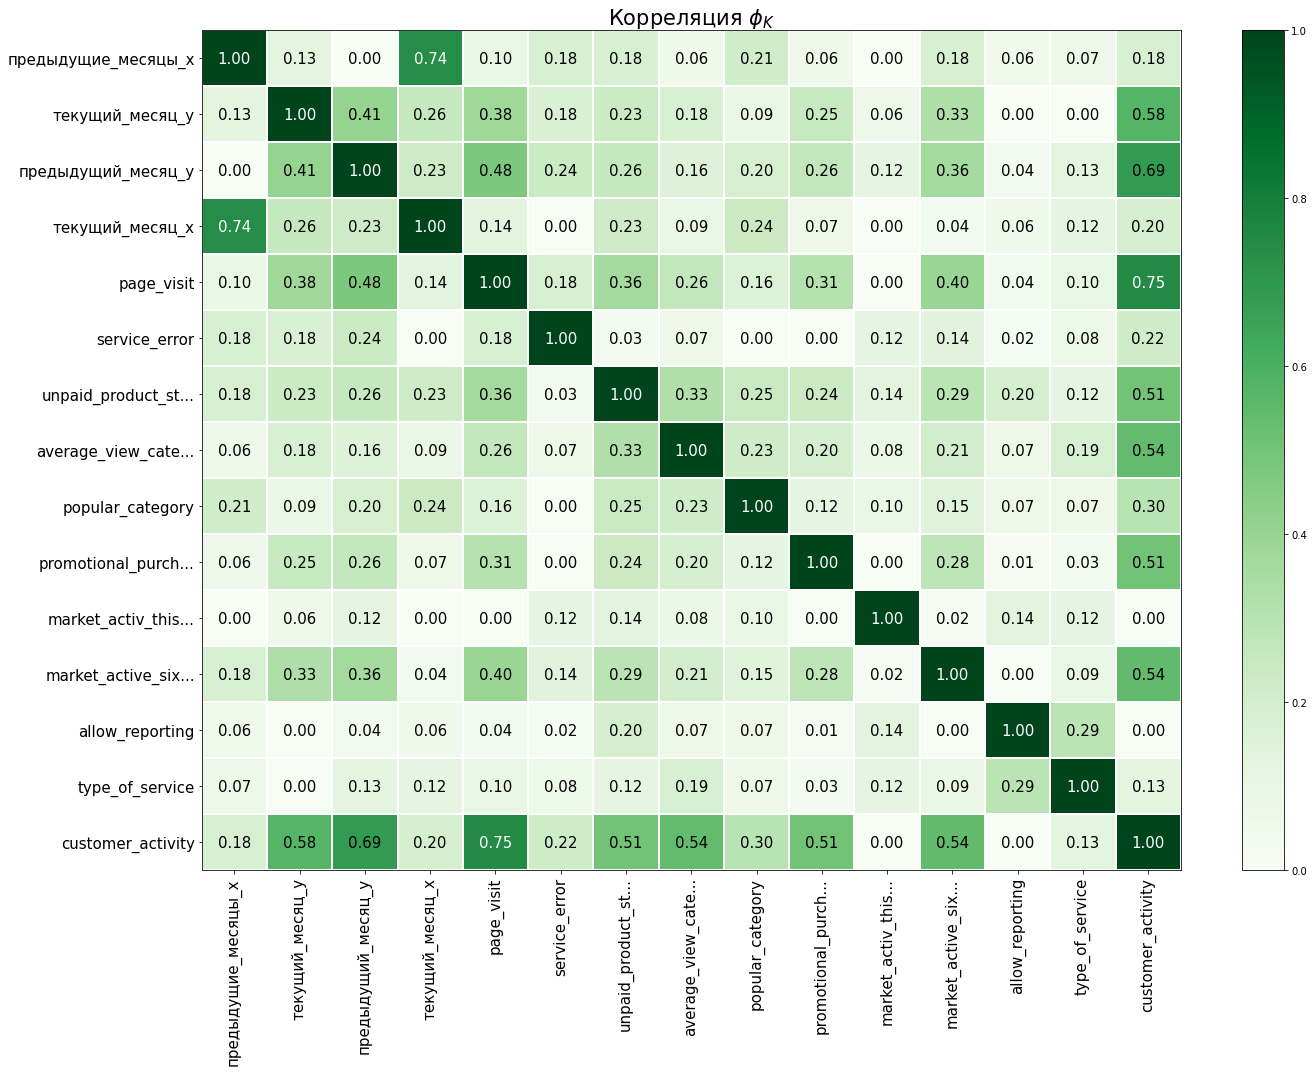

In [89]:
shopper_new1['предыдущие_месяцы_x'] = shopper_new1[['предыдущий_месяц_x', 'препредыдущий_месяц']].sum(axis = 1)
shopper_new1 = shopper_new1.drop(['предыдущий_месяц_x', 'препредыдущий_месяц'], axis = 1)

phik_matr = (shopper_new1.phik_matrix(verbose=False))

plot_correlation_matrix(
    phik_matr.values,
    x_labels=phik_matr.columns,
    y_labels=phik_matr.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'Корреляция $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

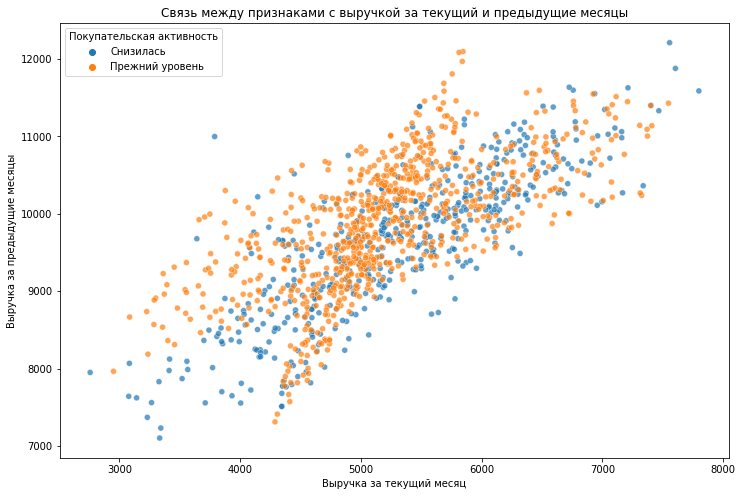

In [90]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(
    x = 'текущий_месяц_x',
    y = 'предыдущие_месяцы_x',
    hue = 'customer_activity',
    data = shopper_new1,
    alpha = 0.7,
    legend = True,
)
plt.title('Связь между признаками с выручкой за текущий и предыдущие месяцы')
plt.legend(title = 'Покупательская активность')
plt.ylabel('Выручка за предыдущие месяцы')
plt.xlabel('Выручка за текущий месяц');

In [91]:
round(shopper_new1['текущий_месяц_x'].corr(shopper_new1['предыдущие_месяцы_x']), 2)

0.72

При суммировании прибыли за два предыдущих месяца коэффициент корреляции уменьшился. Рисунок на графике показывает явление гетерокседастичности, т.е. точки выстраиваются в несколько линий - означающее непостоянство дисперсии случайной ошибки. Это может повляить на качество оценки работы регрессионной модели.

При ситуации, если наоборот вычесть из прибыли за препредыдущий прибыль за предыдущий месяц, то связь останется линейной, но с отрицательным показателем корреляции. 

Это означает, что при изменении показателей прибыли за предыдущие месяцы, изменится и показатель за текущий месяц. 

## Использование пайплайнов

### Самостоятельный подбор 

Для оценки работы моделей будем использовать метрику ROC-AUC, т.к. данная метрика оценивает работу модели независимо от выбранного порога и она лучше всего подойдет для ситуации с дисбалансом классов у целевой переменной.

#### Разделение на выборки

Разделение выборок будем делать с учетом стратификации по целевому признаку, чтобы сохранить соотношение классов исходных данных.

In [92]:
X = shopper_new1.drop('customer_activity', axis = 1)
y = shopper_new1['customer_activity']

X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        random_state = RANDOM_STATE,
        test_size = TEST_SIZE,
        stratify = y)

print(X_train.shape)
print(X_test.shape)

(972, 14)
(324, 14)


Выделим списки с признаками по способу кодирования.

In [93]:
ohe_col = ['popular_category', 'market_activ_this_months']

ord_col = ['type_of_service', 'allow_reporting']

num_col = X_train.select_dtypes(include = 'number').columns.tolist()

Кодируем целевой признак с помощью LabelEncoder. Обозначения в целевом признаке после кодирования 
 - 0 - Прежний уровень
 - 1 - Снизилась

In [94]:
lab_en = LabelEncoder()

y_train = lab_en.fit_transform(y_train)
y_test = lab_en.transform(y_test)

print(y_train.shape)
print(y_test.shape)

(972,)
(324,)


#### Создание пайплайнов

In [95]:
#OheHotEncoder

ohe_pipe = Pipeline(
    [
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
)

#OrdinalEncoder + SimpleImputer для заполнения пропусков медианой

ord_pipe = Pipeline(
    [
        ('ord', OrdinalEncoder(
            categories = [
                ['премиум', 'стандарт'],
                ['да', 'нет']],
            handle_unknown = 'use_encoded_value', unknown_value = np.nan)),
        ('simpleImputer_after', SimpleImputer(missing_values = np.nan, strategy = 'median'))
    ])

Обьединим шаги подготовки данных с помощью ColumnTransormer

In [96]:
column_prep = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_col),
        ('ord', ord_pipe, ord_col),
        ('num', StandardScaler(), num_col)
    ],
    remainder = 'passthrough'
)

После этого можно создать итоговый пайплайн для работы с моделью

##### Логистическая регрессия

In [97]:
final_pipe = Pipeline([
    ('prepare_data', column_prep),
    ('model', LogisticRegression(
        random_state = RANDOM_STATE, 
        penalty = 'l1',
        solver='liblinear',
        class_weight = 'balanced'
    ))
])

parameters = {
    'model__C': range(1, 5),
    'prepare_data__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
}

grid_search_lin = GridSearchCV(
    final_pipe,
    parameters,
    scoring = 'roc_auc',
    cv = 5,
    n_jobs = -1
)

grid_search_lin.fit(X_train, y_train)

display('Лучшие параметры:', grid_search_lin.best_params_)
display('Лучшая метрика при кросс-валидации:', grid_search_lin.best_score_)

'Лучшие параметры:'

{'model__C': 1, 'prepare_data__num': MinMaxScaler()}

'Лучшая метрика при кросс-валидации:'

0.8988551535006082

**При применении разных видов регуляризации модели метрика сильно не меняется, оставаясь равной 0.898.**

In [98]:
display(pd.DataFrame(grid_search_lin.cv_results_).head().sort_values(by = 'mean_test_score', ascending = False))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_prepare_data__num,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.022619,0.000785,0.008592,0.000276,1,MinMaxScaler(),"{'model__C': 1, 'prepare_data__num': MinMaxSca...",0.892674,0.914778,0.888851,0.926239,0.871734,0.898855,0.019376,1
0,0.021219,0.003669,0.010439,0.002280,1,StandardScaler(),"{'model__C': 1, 'prepare_data__num': StandardS...",0.894461,0.909667,0.889527,0.925338,0.872297,0.898258,0.018045,2
4,0.023247,0.001022,0.008263,0.000300,2,MinMaxScaler(),"{'model__C': 2, 'prepare_data__num': MinMaxSca...",0.893679,0.911667,0.888739,0.925788,0.870608,0.898096,0.019046,4
3,0.014724,0.000490,0.007738,0.000193,2,StandardScaler(),"{'model__C': 2, 'prepare_data__num': StandardS...",0.894014,0.908889,0.887500,0.925450,0.870608,0.897292,0.018687,6
2,0.084820,0.008123,0.007949,0.000933,1,passthrough,"{'model__C': 1, 'prepare_data__num': 'passthro...",0.896471,0.909333,0.883221,0.926126,0.867680,0.896566,0.020245,12


##### Модель kNN

In [99]:
pipe_knn = Pipeline([
    ('prepare_data', column_prep),
    ('model', KNeighborsClassifier(metric = 'cityblock'))
])

parameters = {
    'model__n_neighbors': range(2, 10),
    'prepare_data__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
}

grid_search_kn = GridSearchCV(
    pipe_knn,
    parameters,
    scoring = 'roc_auc',
    cv = 5,
    n_jobs = -1
)

grid_search_kn.fit(X_train, y_train)

display('Лучшие параметры:', grid_search_kn.best_params_)
display('Лучшая метрика при кросс-валидации:', grid_search_kn.best_score_)

'Лучшие параметры:'

{'model__n_neighbors': 9, 'prepare_data__num': StandardScaler()}

'Лучшая метрика при кросс-валидации:'

0.8877616571116571

In [100]:
display(pd.DataFrame(grid_search_kn.cv_results_).head().sort_values(by = 'mean_test_score', ascending = False))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,param_prepare_data__num,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.013452,0.000668,0.011027,0.000228,3,StandardScaler(),"{'model__n_neighbors': 3, 'prepare_data__num':...",0.895019,0.845167,0.880011,0.857207,0.869651,0.869411,0.017349,7
0,0.046404,0.053138,0.031471,0.030175,2,StandardScaler(),"{'model__n_neighbors': 2, 'prepare_data__num':...",0.871677,0.838333,0.862950,0.864865,0.868919,0.861349,0.011905,13
4,0.012952,0.000331,0.011232,0.000316,3,MinMaxScaler(),"{'model__n_neighbors': 3, 'prepare_data__num':...",0.877652,0.874833,0.826520,0.864414,0.819257,0.852535,0.024712,15
1,0.014690,0.002614,0.012350,0.001977,2,MinMaxScaler(),"{'model__n_neighbors': 2, 'prepare_data__num':...",0.866763,0.849778,0.811318,0.820270,0.817568,0.833139,0.021409,16
2,0.010987,0.001425,0.010852,0.001394,2,passthrough,"{'model__n_neighbors': 2, 'prepare_data__num':...",0.633181,0.556278,0.625732,0.603097,0.645946,0.612847,0.031528,24


**Метрика ROC-AUC при кросс-валидации и использовании стандартной функции вычисления расстояния составила  0.88, что немного хуже, чем у модели логистической регрессии, но при использовании функции Манхетовского расстояния метрика чуть выросла до 0.899.**

##### Дерево решений

Для подбора параметров у дерева решений лучше использовать RandomizedSearchCV, т.к. такой поиск лучше использовать при большом наборе искомых параметров.

In [101]:
final_pipe = Pipeline([
    ('prepare_data', column_prep),
    ('model', DecisionTreeClassifier(random_state = RANDOM_STATE, class_weight = 'balanced'))
])
parameters = {
    'model__max_depth': range(2, 10),
    'model__min_samples_leaf': range(1, 10),
    'model__min_samples_split': range(2, 10),
    'prepare_data__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
}

grid_search_d = RandomizedSearchCV(
    final_pipe,
    parameters,
    scoring = 'roc_auc',
    cv = 5,
    n_jobs = -1
)

grid_search_d.fit(X_train, y_train)

display('Лучшие параметры:', grid_search_d.best_params_)
display('Лучшая метрика при кросс-валидации:', grid_search_d.best_score_)

'Лучшие параметры:'

{'prepare_data__num': 'passthrough',
 'model__min_samples_split': 4,
 'model__min_samples_leaf': 9,
 'model__max_depth': 7}

'Лучшая метрика при кросс-валидации:'

0.875774809520264

Данная метрика показала результат немного хуже, чем предыдущие модели. Лучшая метрика 0.857.

In [102]:
display(pd.DataFrame(grid_search_d.cv_results_).head().sort_values(by = 'mean_test_score', ascending = False))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_prepare_data__num,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.015620,0.002643,0.007729,0.001215,passthrough,4,9,7,"{'prepare_data__num': 'passthrough', 'model__m...",0.868718,0.881778,0.877196,0.927252,0.823930,0.875775,0.032941,1
4,0.016147,0.001967,0.008223,0.001139,StandardScaler(),5,4,4,"{'prepare_data__num': StandardScaler(), 'model...",0.820415,0.870833,0.860360,0.915315,0.815653,0.856516,0.036470,4
2,0.016874,0.000281,0.007956,0.000344,StandardScaler(),4,4,9,"{'prepare_data__num': StandardScaler(), 'model...",0.828289,0.862056,0.815822,0.884009,0.846565,0.847348,0.024158,7
3,0.015680,0.000453,0.007798,0.000255,MinMaxScaler(),5,2,5,"{'prepare_data__num': MinMaxScaler(), 'model__...",0.847833,0.838111,0.852365,0.871734,0.799268,0.841862,0.023944,9
0,0.015130,0.001493,0.008658,0.001112,MinMaxScaler(),7,5,2,"{'prepare_data__num': MinMaxScaler(), 'model__...",0.800927,0.831056,0.807376,0.851182,0.756644,0.809437,0.031855,10


**Пока дерево решений показывает худший результат по всем метрикам.**

##### Метод опорных векторов

In [103]:
final_pipe = Pipeline([
    ('prepare_data', column_prep),
    ('model', SVC(random_state = RANDOM_STATE, class_weight = 'balanced'))
])
parameters = {
    'model__C':range(1, 10),
    'model__kernel': ['linear', 'rbf', 'sigmoid'],
    'prepare_data__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
}

random_search_svc = RandomizedSearchCV(
    final_pipe,
    parameters,
    scoring = 'roc_auc',
    cv = 5,
    n_jobs = -1
)

random_search_svc.fit(X_train, y_train)

print('Лучшие параметры:', random_search_svc.best_params_)
print('Лучшая метрика при кросс-валидации:', random_search_svc.best_score_)

Лучшие параметры: {'prepare_data__num': MinMaxScaler(), 'model__kernel': 'rbf', 'model__C': 1}
Лучшая метрика при кросс-валидации: 0.8971687911051548


Итог самостоятельного подбора:
1. Логистическая регрессия
 - Параметры: 'model__C': 1, 'prepare_data__num': MinMaxScaler(); Лучшая метрика при кросс-валидации: 0.8986823914823914


2. Модель kNN
 - Параметры: 'model__n_neighbors': 9, 'prepare_data__num': StandardScaler(); Лучшая метрика при кросс-валидации: 0.8840468877968878


3. Дерево решений
 - Параметры: 'prepare_data__num': 'passthrough', 'model__min_samples_split': 9, 'model__min_samples_leaf': 9, 'model__max_depth': 6; Лучшая метрика при кросс-валидации: 0.87238855632492


4. Метод опорных векторов
 - Параметры: 'prepare_data__num': StandardScaler(), 'model__kernel': 'rbf', 'model__C': 6; Лучшая метрика при кросс-валидации: 0.8970409698955153

**Лучшая метрика среди всех моделей наблюдается у логистической регрессии - 0.898. Сравним результаты после подбора модели общим пайплайном.**

### Подбор с помощью общего пайплайна

In [104]:
final_pipe = Pipeline([
    ('prepare_data', column_prep),
    ('models', DecisionTreeClassifier(random_state = RANDOM_STATE))
])

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 10),
        'models__max_features': range(2, 10),
        'prepare_data__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier(metric = 'cityblock')],
        'models__n_neighbors': range(2, 10),
        'prepare_data__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            penalty='l2',
            class_weight = 'balanced'
        )],
        'models__C': range(1, 10),
        'prepare_data__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    #SVC()
    {
        'models':[SVC(random_state = RANDOM_STATE, 
                      class_weight = 'balanced')],
        'models__C':range(1, 10),
        'models__kernel': ['linear', 'rbf', 'sigmoid'],
        'prepare_data__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

randomized_search = RandomizedSearchCV(
    final_pipe, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)


print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('prepare_data',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['popular_category',
                                                   'market_activ_this_months']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['премиум',
                                                

Перебор всех моделей показал следующий результат:
- Лучшая модель - LogisticRegression(C=2, class_weight='balanced'),
- Лучшая метрика 0,898
- Лучший способ масштабирования StandardScaler()

In [105]:
display(pd.DataFrame(randomized_search.cv_results_).head(10).sort_values(by = 'mean_test_score', ascending = False))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_prepare_data__num,param_models__max_features,param_models__max_depth,param_models,param_models__C,param_models__n_neighbors,param_models__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.164959,0.039116,0.178194,0.032814,StandardScaler(),NaN,NaN,"LogisticRegression(class_weight='balanced', ra...",2.0,NaN,NaN,"{'prepare_data__num': StandardScaler(), 'model...",0.894461,0.907444,0.887050,0.924887,0.870495,0.896867,0.018410,1
7,0.012560,0.000206,0.011651,0.002018,MinMaxScaler(),NaN,NaN,KNeighborsClassifier(metric='cityblock'),NaN,3.0,NaN,"{'prepare_data__num': MinMaxScaler(), 'models_...",0.877652,0.874833,0.826520,0.864414,0.819257,0.852535,0.024712,2
2,0.011987,0.000412,0.006680,0.000178,passthrough,7.0,7.0,DecisionTreeClassifier(random_state=42),NaN,NaN,NaN,"{'prepare_data__num': 'passthrough', 'models__...",0.845265,0.903722,0.803885,0.862387,0.791273,0.841306,0.040644,3
1,0.014734,0.000431,0.007978,0.000266,StandardScaler(),6.0,6.0,DecisionTreeClassifier(random_state=42),NaN,NaN,NaN,"{'prepare_data__num': StandardScaler(), 'model...",0.838899,0.824500,0.856025,0.851745,0.781532,0.830540,0.026860,4
5,0.015071,0.000165,0.008812,0.000444,StandardScaler(),4.0,7.0,DecisionTreeClassifier(random_state=42),NaN,NaN,NaN,"{'prepare_data__num': StandardScaler(), 'model...",0.770605,0.859389,0.851802,0.807545,0.801351,0.818138,0.033131,5
9,0.014052,0.000678,0.007778,0.000142,StandardScaler(),2.0,8.0,DecisionTreeClassifier(random_state=42),NaN,NaN,NaN,"{'prepare_data__num': StandardScaler(), 'model...",0.776971,0.806333,0.816160,0.845383,0.801914,0.809352,0.022170,6
4,0.017316,0.003040,0.008790,0.000708,StandardScaler(),6.0,9.0,DecisionTreeClassifier(random_state=42),NaN,NaN,NaN,"{'prepare_data__num': StandardScaler(), 'model...",0.819913,0.807056,0.774493,0.830518,0.766047,0.799605,0.025220,7
3,0.016015,0.002396,0.009429,0.001615,StandardScaler(),5.0,2.0,DecisionTreeClassifier(random_state=42),NaN,NaN,NaN,"{'prepare_data__num': StandardScaler(), 'model...",0.772671,0.842389,0.822072,0.831081,0.719482,0.797539,0.045716,8
0,0.015132,0.000401,0.009973,0.003765,StandardScaler(),6.0,7.0,DecisionTreeClassifier(random_state=42),NaN,NaN,NaN,"{'prepare_data__num': StandardScaler(), 'model...",0.839681,0.767444,0.840991,0.767342,0.762725,0.795637,0.036539,9
8,0.037731,0.001043,0.014283,0.000158,passthrough,NaN,NaN,"SVC(class_weight='balanced', random_state=42)",3.0,NaN,rbf,"{'prepare_data__num': 'passthrough', 'models__...",0.675341,0.650556,0.664752,0.622973,0.692793,0.661283,0.023602,10


После перебора всех моделей, посмотрим, какую метрику покажет лучшая модель на тестовых данных.

In [106]:
model = randomized_search.best_estimator_
predict = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]


acc = accuracy_score(y_test, predict)
roc_auc = roc_auc_score(y_test, pred_proba)
f1 = f1_score(y_test, predict)


print('Accuracy:', acc)
print('ROC_AUC:', roc_auc)
print('F1_score:', f1)

Accuracy: 0.8765432098765432
ROC_AUC: 0.9174048456902479
F1_score: 0.84


Модель логистической регрессии выдала следующий результат метрики на тестовых данных:
- ROC-AUC: 0.9180924645067347

Для сравнения значение метики на тренировочном наборе данных:
- ROC-AUC: 0.8979459186459187

Метрика выросла при тестировании на тестовых данных, модель не переобучена.

## Анализ важности признаков

Извлечем модель и обработку данных из пайплайна и подготовим данные для тестирования Дамми-модели

In [107]:
#Извлекаем модель из пайплайна
model_clf = randomized_search.best_estimator_.named_steps['models']

#шаг для преобразования данных
prepare_data = randomized_search.best_estimator_.named_steps['prepare_data']

#имена признаков модели
feature_names = randomized_search.best_estimator_.named_steps['prepare_data'].get_feature_names_out()

print('Модель и её параметры')
display(model_clf)
print('Шаг подготовки данных')
display(prepare_data)
print('Имена признаков')
display(feature_names)

Модель и её параметры


LogisticRegression(C=2, class_weight='balanced', random_state=42)

Шаг подготовки данных


ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['popular_category',
                                  'market_activ_this_months']),
                                ('ord',
                                 Pipeline(steps=[('ord',
                                                  OrdinalEncoder(categories=[['премиум',
                                                                              'стандарт'],
                                                                             ['да',
                                                                              'нет']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=nan)),
                                                 ('simpleImputer_after',
                                                  SimpleImputer(strategy='median'))]),
                                 ['type_of_service', 'allow_reporting']),
                                ('num', StandardScaler(),
                                 ['market_active_six_months',
                                  'promotional_purchases',
                                  'average_view_category_visit',
                                  'unpaid_product_stack_quart', 'service_error',
                                  'page_visit', 'текущий_месяц_x',
                                  'предыдущий_месяц_y', 'текущий_месяц_y',
                                  'предыдущие_месяцы_x'])])

Имена признаков


array(['ohe__popular_category_Косметика и аксесуары',
       'ohe__popular_category_Кухонная посуда',
       'ohe__popular_category_Мелкая бытовая техника и электроника',
       'ohe__popular_category_Техника для красоты и здоровья',
       'ohe__popular_category_Товары для детей',
       'ohe__market_activ_this_months_меньше 4', 'ord__type_of_service',
       'ord__allow_reporting', 'num__market_active_six_months',
       'num__promotional_purchases', 'num__average_view_category_visit',
       'num__unpaid_product_stack_quart', 'num__service_error',
       'num__page_visit', 'num__текущий_месяц_x',
       'num__предыдущий_месяц_y', 'num__текущий_месяц_y',
       'num__предыдущие_месяцы_x'], dtype=object)

Преобразуем данные для дальнейшего использования

In [108]:
X_train_new = prepare_data.fit_transform(X_train)
X_test_new = prepare_data.transform(X_test)
X_train_new = pd.DataFrame(X_train_new, columns = feature_names)
X_test_new = pd.DataFrame(X_test_new, columns = feature_names)
display(X_train_new.head())
display(X_test_new.head())

,ohe__popular_category_Косметика и аксесуары,ohe__popular_category_Кухонная посуда,ohe__popular_category_Мелкая бытовая техника и электроника,ohe__popular_category_Техника для красоты и здоровья,ohe__popular_category_Товары для детей,ohe__market_activ_this_months_меньше 4,ord__type_of_service,ord__allow_reporting,num__market_active_six_months,num__promotional_purchases,num__average_view_category_visit,num__unpaid_product_stack_quart,num__service_error,num__page_visit,num__текущий_месяц_x,num__предыдущий_месяц_y,num__текущий_месяц_y,num__предыдущие_месяцы_x
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.228498,-0.678649,-0.926450,0.554520,1.446808,1.973431,0.921997,1.641373,-1.744172,-0.317306
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.829033,-0.354956,0.559539,1.048557,-1.130716,-1.316315,-1.724921,-0.647600,-0.064910,1.377843
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.030104,-0.597726,1.302533,-0.927589,-0.615212,0.708144,-1.714569,-0.138940,-0.784593,-1.209279
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.328364,2.517826,-0.926450,2.036630,0.415798,-0.051028,-0.562990,0.115391,1.374458,0.463528
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.668960,0.292432,-0.183455,-0.433553,-1.130716,-0.810200,-0.760751,-0.901931,-0.784593,-1.589670


,ohe__popular_category_Косметика и аксесуары,ohe__popular_category_Кухонная посуда,ohe__popular_category_Мелкая бытовая техника и электроника,ohe__popular_category_Техника для красоты и здоровья,ohe__popular_category_Товары для детей,ohe__market_activ_this_months_меньше 4,ord__type_of_service,ord__allow_reporting,num__market_active_six_months,num__promotional_purchases,num__average_view_category_visit,num__unpaid_product_stack_quart,num__service_error,num__page_visit,num__текущий_месяц_x,num__предыдущий_месяц_y,num__текущий_месяц_y,num__предыдущие_месяцы_x
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.169629,-0.678649,2.045527,-0.927589,-0.099707,0.961202,-2.320463,0.624051,0.894668,-1.041998
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-2.866015,2.517826,-0.183455,1.542593,-1.646221,-0.557143,-1.271572,-0.647600,-1.024488,-1.822259
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.968558,-0.759573,0.559539,-0.433553,1.962313,0.455087,1.304666,1.641373,-0.544699,0.245834
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.768826,0.130585,0.559539,0.060484,0.415798,-0.557143,1.807872,-1.156261,-1.024488,2.065298
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.228498,2.720134,-1.669444,-0.433553,-0.615212,-0.304085,0.635946,0.369721,1.134563,-0.290381


In [109]:
model_clf.fit(X_train_new, y_train)

predict = model_clf.predict(X_test_new)
predict_proba = model_clf.predict_proba(X_test_new)[:, 1]
predict_train = model_clf.predict(X_train_new)
predict_proba_train = model_clf.predict_proba(X_train_new)[:, 1]

### Проверка модели на адекватность

In [110]:
dummy_model = DummyClassifier(random_state = RANDOM_STATE, strategy = 'prior')
dummy_model.fit(X_train_new, y_train)

dummy_pred = dummy_model.predict(X_test_new)
dummy_pred_proba = dummy_model.predict_proba(X_test_new)[:,1]

acc = accuracy_score(y_test, dummy_pred)
roc_auc = roc_auc_score(y_test, dummy_pred_proba)
f1 = f1_score(y_test, dummy_pred)
cross_val = cross_val_score(dummy_model, X_train_new, y_train, scoring = 'roc_auc').mean()

print('Метрика ROC_AUC при кросс-валидации на тренировочных данных:', cross_val)
print('Accuracy:', acc)
print('ROC_AUC:', roc_auc)
print('F1_score:', f1)

Метрика ROC_AUC при кросс-валидации на тренировочных данных: 0.5
Accuracy: 0.6203703703703703
ROC_AUC: 0.5
F1_score: 0.0


В сравнении с метриками, которые предсказала дамми-модель, лучшая модель является адекватной и вполне эффективной.

### Рейтинг признаков модели

In [111]:
for feature_number, feature_name in enumerate(X_train_new.columns):
    weight = model_clf.coef_[0, feature_number]
    print(f"{feature_name:<20}:     {weight:+.2f}")

ohe__popular_category_Косметика и аксесуары:     -0.15
ohe__popular_category_Кухонная посуда:     -0.30
ohe__popular_category_Мелкая бытовая техника и электроника:     -1.12
ohe__popular_category_Техника для красоты и здоровья:     -0.62
ohe__popular_category_Товары для детей:     -0.32
ohe__market_activ_this_months_меньше 4:     +0.09
ord__type_of_service:     +0.08
ord__allow_reporting:     -0.17
num__market_active_six_months:     -0.46
num__promotional_purchases:     +0.67
num__average_view_category_visit:     -0.66
num__unpaid_product_stack_quart:     +0.55
num__service_error  :     -0.11
num__page_visit     :     -0.62
num__текущий_месяц_x:     -0.03
num__предыдущий_месяц_y:     -0.59
num__текущий_месяц_y:     -0.48
num__предыдущие_месяцы_x:     -0.05


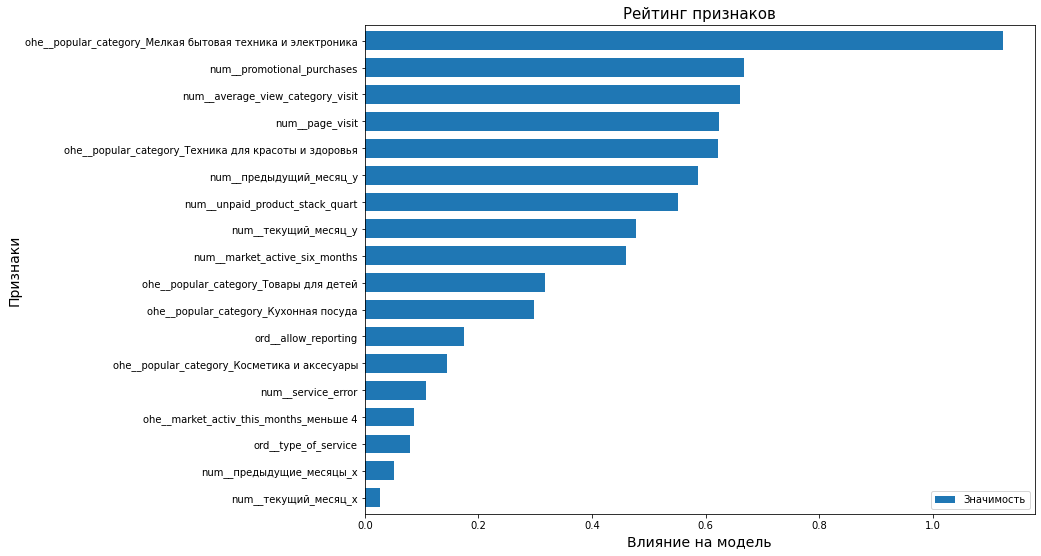

In [112]:
coeffs = model_clf.coef_[0]
feature_importance = pd.DataFrame({'Признак': X_train_new.columns, 'Значимость': np.abs(coeffs)})
feature_importance = feature_importance.sort_values(by='Значимость', ascending=True)
feature_importance.plot(x='Признак', 
                        y='Значимость', 
                        kind='barh', 
                        figsize=(12, 9),
                        lw=1,  
                        width=0.7
                        )

plt.xlabel('Влияние на модель', fontsize=14)
plt.ylabel('Признаки', fontsize=14)
plt.title('Рейтинг признаков', fontsize=15)
plt.show()

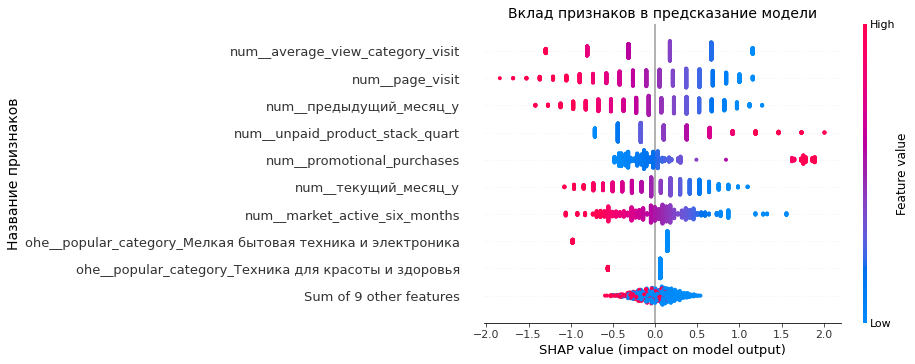

In [113]:
explainer = shap.LinearExplainer(model_clf, X_train_new)
shap_values = explainer(X_train_new)

fig, ax = plt.subplots(figsize=(15, 20))
plt.xlabel('Влияние признаков на работу модели')
plt.ylabel('Название признаков', fontsize = 14)
plt.title('Вклад признаков в предсказание модели', fontsize = 14)

shap.plots.beeswarm(shap_values)

Обозначения целевого признака - пользовательская активность

0. Прежний уровень
1. Снизилась

Большее влияение на результат модели оказывают следующие признаки:
- **Склоняют модель отнести объекты к классу 0:**
 - average_view_category_visit(-0.66)
 - page_visit(-0.62)
 - предыдущий_месяц_y(время проведенное на сайте)(-0.59)
 
О стабильном уровне активности покупателя говорит количество просмотренных категорий, количество посещенных страниц и проведенное время на сайте.
 
 
- **Склоняют модель отнести объекты к классу 1:**
 - unpaid_product_stack_quart(+0.55)
 - promotional_purchases(+0.67)
 
О снижении активности клиентов можно узнать, если в корзине в течении 3-х месяцев лежат неоплаченные покупки и они совершают покупки только по акции.
 
По толщине линий по вертикали видно, что модель уверенно присваивает значения Шепли с учетом закономерности в данных.

**Из этого складывается образ неактивного покупателя: не интересуется ассортиментом магазина, мало времени проводит на сайте, у таких клиентов долгое время в корзине лежат отложенные товары и покупает он только товары по акции.**

### Отберем признаки с помощью SelectKBest

Для отбора признаков будем использовать метод f_classif - тест на основании линейной зависимости между двумя случайными признаками. Он сравнивает изменения между входным признаком и целевым, чтобы проверить, влияют ли они друг на друга.

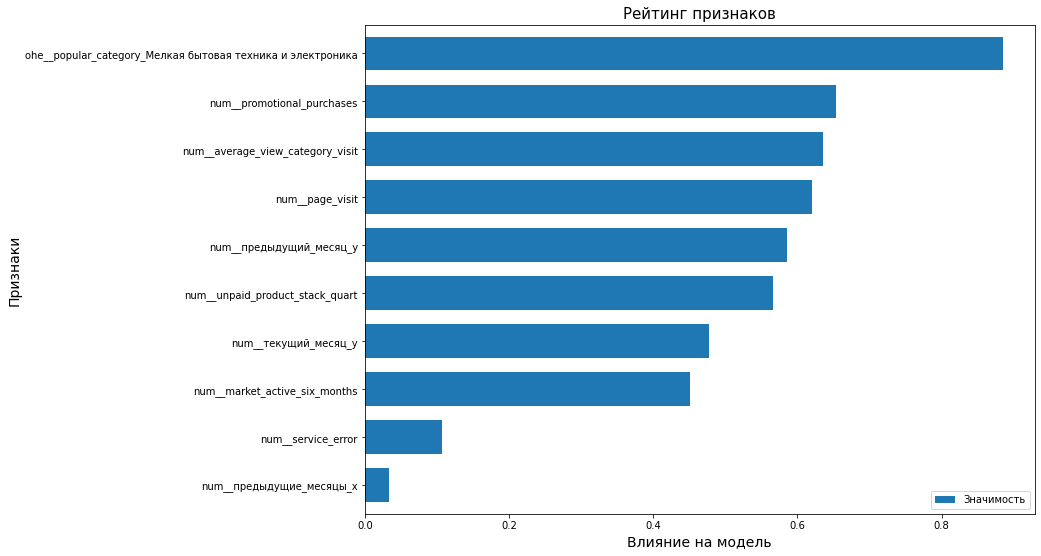

In [114]:
selector = SelectKBest(f_classif, k = 10)

X_new = selector.fit_transform(X_train_new, y_train)

feature_names = selector.get_feature_names_out()
X_new = pd.DataFrame(X_new, columns = feature_names)

model_clf2 = model_clf
model_clf2.fit(X_new, y_train)

coeffs = model_clf2.coef_[0]
feature_importance = pd.DataFrame({'Признак': X_new.columns, 'Значимость': np.abs(coeffs)})
feature_importance = feature_importance.sort_values(by='Значимость', ascending=True)
feature_importance.plot(x='Признак', 
                        y='Значимость', 
                        kind='barh', 
                        figsize=(12, 9),
                        lw=1,  
                        width=0.7
                        )

plt.xlabel('Влияние на модель', fontsize=14)
plt.ylabel('Признаки', fontsize=14)
plt.title('Рейтинг признаков', fontsize=15)
plt.show()

### Матрица ошибок

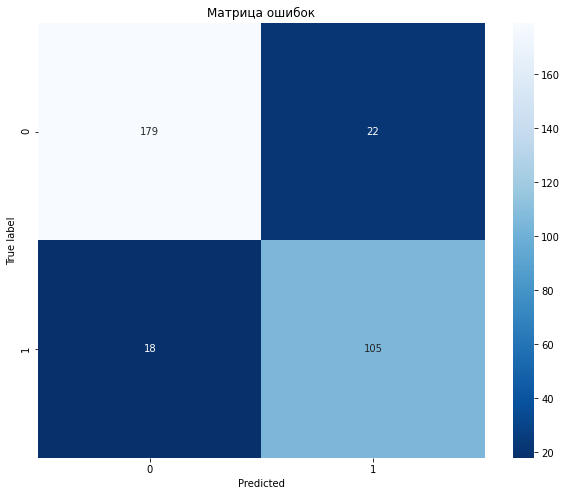

In [115]:
fig, ax = plt.subplots(figsize = (10, 8))

cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')

plt.title('Матрица ошибок')
plt.ylabel('True label')
plt.xlabel('Predicted');

Объекты разделились следующим образом:
- 179 обьектов отнесены с классу "Прежний уровень"
- 105 объектов со сниженой активностью
- 22 ошибки первого рода - клиентов с прежней активностью показывает снижение активности
- 18 ошибок второго рода - показывает, что у клиентов со снижающейся активностью она осталась прежней.

Более критичной в ситуации удержания клиентов является **ошибка второго рода**, т.к. если клиенты со снижающейся активностью будут приняты за клиентов с прежним уровнем, то есть риск потерять часть платежеспособных клиентов магазина, нежели предлагать клиентам с постоянной активностью специальные предложения.

Также рассмотрим качество работы модели с помощью метрик precision и recall

In [116]:
precision_score(y_test, predict)

0.8267716535433071

Без учета ошибки второго рода, модель верно присваивает метку 1  в 82% случаев

In [117]:
recall_score(y_test, predict)

0.8536585365853658

Без учета ошибки первого рода, модель верно присваивает метку 0 в 85% случаев

#### Подбор порога

Для минимализации ошибок второго рода будем подбирать соответствующий порог

In [118]:
data = pd.DataFrame(zip(y_test, predict_proba),
                    columns = ['y_valid', 'proba']).sort_values(by='proba',ascending=False)
data.head()

,y_valid,proba
291,1,0.999172
180,1,0.998518
296,1,0.998362
212,1,0.997989
55,1,0.997415


Посмотрим на работу модели с разными порогами.

In [119]:
porog = [0.1, 0.2, 0.3, 0.4, 0.55]

In [120]:
columns = []
precision = []
recall = []
accuracy = []
roc_auc = []
false_negative = []

for i in porog:
    columns.append('pred_'+str(i))
    preds = np.where(predict_proba > i, 1, 0)
    precision.append(round(precision_score(y_test, preds), 2))
    recall.append(round(recall_score(y_test, preds), 2))
    accuracy.append(round(accuracy_score(y_test, preds), 2))
    roc_auc.append(round(roc_auc_score(y_test, preds), 3))
    false_negative.append(confusion_matrix(y_test, preds)[1, 0])
    
data = pd.DataFrame(zip(columns, precision, recall, accuracy, roc_auc, false_negative), 
                    columns = ['Порог', 'precision', 'recall', 'accuracy', 'roc_auc', 'Ошибка второго рода'])
data

,Порог,precision,recall,accuracy,roc_auc,Ошибка второго рода
0,pred_0.1,0.47,0.95,0.57,0.642,6
1,pred_0.2,0.55,0.92,0.68,0.728,10
2,pred_0.3,0.65,0.87,0.77,0.791,16
3,pred_0.4,0.74,0.86,0.83,0.836,17
4,pred_0.55,0.87,0.84,0.89,0.881,20


При понижении порога для избавления от ошибки второго рода уменьшается качество модели, поэтому оставим все как есть.

## Сегментация покупателей

### Объединение данных

Для выделения сегмента покупателей объединим все имеющиеся данные в одну таблицу - добавим столбец с показателем прибыли от каждого клиента и столбец с вероятностью снижения покупательской активности.

In [121]:
#Вставляем столбцы с предсказаниями активности покупателя
X_train['customer_activity'] = predict_train
X_test['customer_activity'] = predict

#вставляем столбцы с вероятностью снижения покупательской активности
X_train['proba_discrase'] = np.around(predict_proba_train, 2)
X_test['proba_discrase'] = np.around(predict_proba, 2)

#объединяем тестовый и тренировочный датасеты
total_data = pd.concat([X_train, X_test])

#вставляем столбец с идентификатором, ориентируясь на индексы
total_data = pd.merge(total_data, shopper_new['id'], left_index = True, right_index = True)

#присоединяем таблицу с показателем прибыли
total_data = total_data.merge(gain_info, on = 'id')

#проверка присоединения столбцов, таблиц и размерности
display(X_train.head())
print(X_train.shape)
display(X_test.head())
print(X_test.shape)
display(total_data.head())
print(total_data.shape)

,type_of_service,allow_reporting,market_active_six_months,market_activ_this_months,promotional_purchases,popular_category,average_view_category_visit,unpaid_product_stack_quart,service_error,page_visit,текущий_месяц_x,предыдущий_месяц_y,текущий_месяц_y,предыдущие_месяцы_x,customer_activity,proba_discrase
506,стандарт,да,5.5,больше 4,0.15,Мелкая бытовая техника и электроника,2,4,7,16,6014.2,20,6,9517.5,0,0.07
10,стандарт,да,5.1,больше 4,0.23,Техника для красоты и здоровья,4,5,2,3,3789.7,11,13,10997.0,1,0.63
532,стандарт,да,4.3,больше 4,0.17,Мелкая бытовая техника и электроника,5,1,3,11,3798.4,13,10,8739.0,0,0.08
1212,стандарт,да,5.6,больше 4,0.94,Кухонная посуда,2,7,5,8,4766.2,14,19,10199.0,1,0.88
363,премиум,да,3.6,больше 4,0.39,Товары для детей,3,2,2,5,4600.0,10,10,8407.0,1,0.86


(972, 16)


,type_of_service,allow_reporting,market_active_six_months,market_activ_this_months,promotional_purchases,popular_category,average_view_category_visit,unpaid_product_stack_quart,service_error,page_visit,текущий_месяц_x,предыдущий_месяц_y,текущий_месяц_y,предыдущие_месяцы_x,customer_activity,proba_discrase
809,стандарт,да,4.1,больше 4,0.15,Техника для красоты и здоровья,6,1,4,12,3289.2,16,17,8885.0,0,0.02
302,премиум,нет,1.4,больше 4,0.94,Товары для детей,3,6,1,6,4170.7,11,9,8204.0,1,0.99
955,премиум,да,3.3,больше 4,0.13,Домашний текстиль,4,2,8,10,6335.8,20,11,10009.0,0,0.15
149,премиум,да,3.5,меньше 4,0.35,Домашний текстиль,4,3,5,6,6758.7,9,9,11597.0,1,0.84
582,стандарт,нет,5.5,больше 4,0.99,Мелкая бытовая техника и электроника,1,2,3,7,5773.8,15,18,9541.0,1,0.63


(324, 16)


,type_of_service,allow_reporting,market_active_six_months,market_activ_this_months,promotional_purchases,popular_category,average_view_category_visit,unpaid_product_stack_quart,service_error,page_visit,текущий_месяц_x,предыдущий_месяц_y,текущий_месяц_y,предыдущие_месяцы_x,customer_activity,proba_discrase,id,gain
0,стандарт,да,5.5,больше 4,0.15,Мелкая бытовая техника и электроника,2,4,7,16,6014.2,20,6,9517.5,0,0.07,215858,4.37
1,стандарт,да,5.1,больше 4,0.23,Техника для красоты и здоровья,4,5,2,3,3789.7,11,13,10997.0,1,0.63,215361,4.03
2,стандарт,да,4.3,больше 4,0.17,Мелкая бытовая техника и электроника,5,1,3,11,3798.4,13,10,8739.0,0,0.08,215884,4.37
3,стандарт,да,5.6,больше 4,0.94,Кухонная посуда,2,7,5,8,4766.2,14,19,10199.0,1,0.88,216564,5.58
4,премиум,да,3.6,больше 4,0.39,Товары для детей,3,2,2,5,4600.0,10,10,8407.0,1,0.86,215715,4.87


(1296, 18)


In [122]:
print(f'Количество значений NaN: \n{total_data.isna().sum()}\n')
print(f'Количество дубликатов: {total_data.duplicated().sum()}')

Количество значений NaN: 
type_of_service                0
allow_reporting                0
market_active_six_months       0
market_activ_this_months       0
promotional_purchases          0
popular_category               0
average_view_category_visit    0
unpaid_product_stack_quart     0
service_error                  0
page_visit                     0
текущий_месяц_x                0
предыдущий_месяц_y             0
текущий_месяц_y                0
предыдущие_месяцы_x            0
customer_activity              0
proba_discrase                 0
id                             0
gain                           0
dtype: int64

Количество дубликатов: 0


### Исследование сегмента пользователей

Таблица со всеми данными готова, можно приступать к сегментации покупателей. Отберем покупателей с высокой вероятностью снижения активности и высокой долей прибыли, получаемой с клиента, т.к. именно у них мы должны сохранить активность на прежнем уровне, чтобы избежать потерю прибыли.

Выделим следующие показатели:
 - высокая выроятность снижения активности - больше или равная 0.6
 - высокий показатель прибыли - больше или равный 5

In [123]:
customer_segment = total_data.query('proba_discrase >= 0.6 and gain >= 5')
display(customer_segment.head())
print(f'Всего клиентов, приносящих высокую прибыль, с большим риском снижения активности: {customer_segment.shape[0]}')

,type_of_service,allow_reporting,market_active_six_months,market_activ_this_months,promotional_purchases,popular_category,average_view_category_visit,unpaid_product_stack_quart,service_error,page_visit,текущий_месяц_x,предыдущий_месяц_y,текущий_месяц_y,предыдущие_месяцы_x,customer_activity,proba_discrase,id,gain
3,стандарт,да,5.6,больше 4,0.94,Кухонная посуда,2,7,5,8,4766.2,14,19,10199.0,1,0.88,216564,5.58
11,стандарт,да,3.9,меньше 4,0.22,Товары для детей,4,5,4,5,4260.1,11,14,8701.0,1,0.73,215451,5.31
71,стандарт,да,3.4,больше 4,0.22,Домашний текстиль,2,3,8,4,6830.2,12,6,10681.0,1,0.92,215396,5.09
80,стандарт,нет,4.1,больше 4,0.99,Кухонная посуда,3,4,5,7,6658.6,16,15,10445.5,1,0.83,216357,5.02
104,премиум,нет,3.4,больше 4,0.28,Товары для детей,4,2,2,7,5833.7,9,9,10035.0,1,0.69,215439,6.33


Всего клиентов, приносящих высокую прибыль, с большим риском снижения активности: 70


Если обратится к рейтингу признаков модели, где описывался образ покупателя, то можно заметить, что такие покупатели чаще совершают покупки только по акции. Значит для данного сегмента подойдет решение увеличить рассылку объявлений о новых акциях в магазине.

Стоит учесть и наиболее популярные категории товаров на сайте - стоит присылать сообщения об акциях в этих категориях

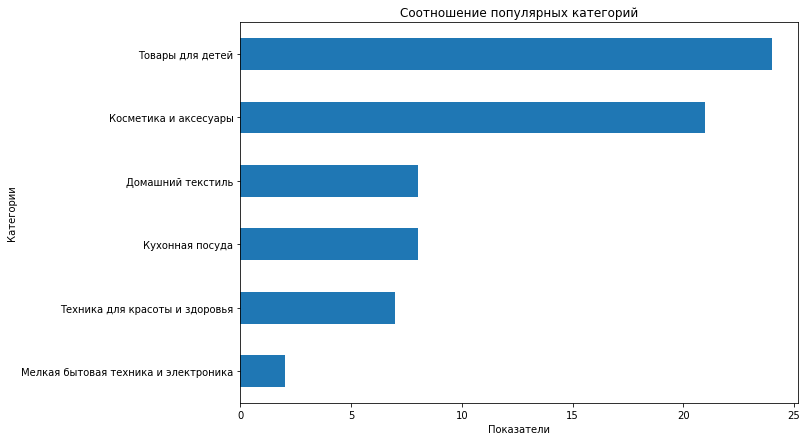

In [124]:
customer_segment['popular_category'].value_counts().sort_values(ascending = True).plot(
    kind = 'barh',
    figsize = (10, 7),
    title = 'Соотношение популярных категорий'
)
plt.xlabel('Показатели')
plt.ylabel('Категории');

Топ 5 популярных категорий, согласно графику:
1. Товары для детей
2. Косметика и аксессуары
3. Кухонная посуда
4. Домашний текстиль
5. Техника для красоты и здоровья

Посмотрим количество людей в этом сегменте, которые согласны получать сообщения

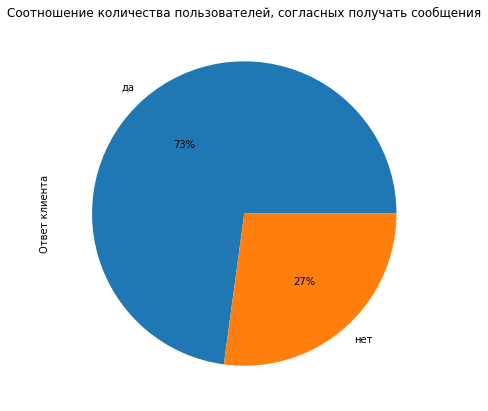

In [125]:
customer_segment['allow_reporting'].value_counts().plot(
    kind = 'pie',
    figsize = (7, 7),
    autopct = '%0.f%%',
    title = 'Соотношение количества пользователей, согласных получать сообщения'
)
plt.ylabel('Ответ клиента');

Больше половины согласны получать рассылку. 

Также стоит изучить и распределение данных в столбцах с прибылью и вероятностью. Сравним ситуации в общей таблице и сегменте

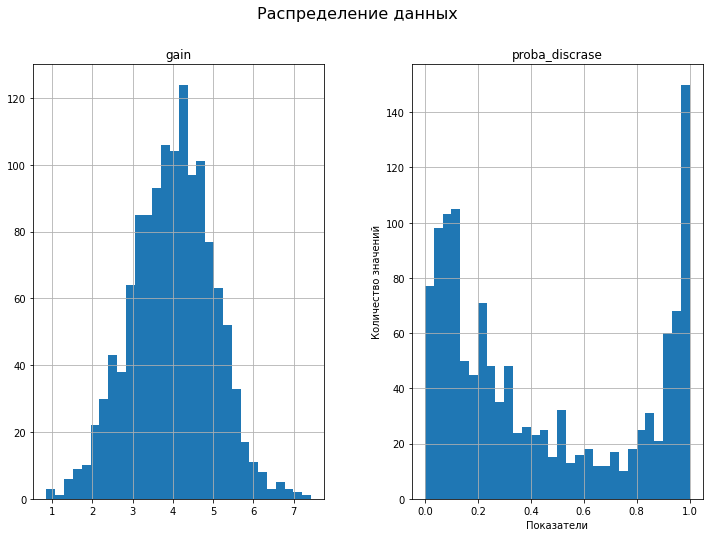

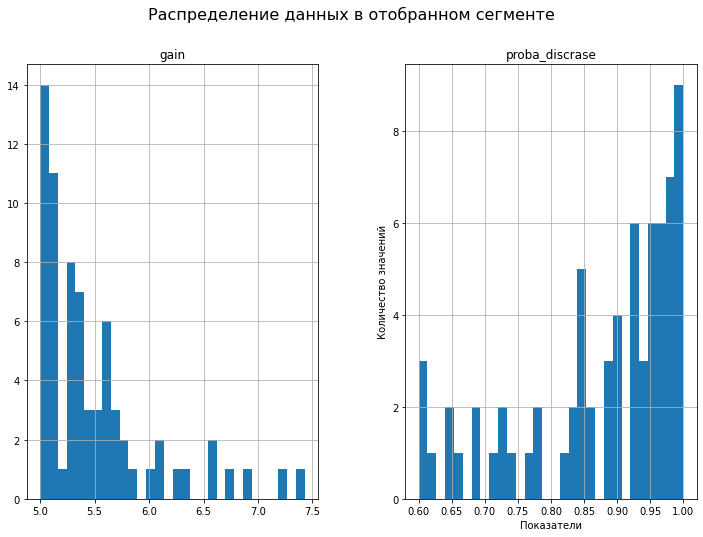

In [126]:
total_data[['gain', 'proba_discrase']].hist(figsize = (12, 8), bins = 30)

plt.xlabel('Показатели')
plt.ylabel('Количество значений')
plt.suptitle('Распределение данных', fontsize = 16)

customer_segment[['gain', 'proba_discrase']].hist(figsize = (12, 8), bins = 30)

plt.xlabel('Показатели')
plt.ylabel('Количество значений')
plt.suptitle('Распределение данных в отобранном сегменте', fontsize = 16);

В данных со всеми группами покупателей пик значений прибыли расположен от 4 до 5, и вероятность ухода имеет два пика - от 0 до 0.2 и пик знаений сегмента. Большиство клиентов с постоянной активностью и средней прибылью.

Большинство значений прибыли расположены в промежутке от 5 до 5,9. На соседнем графике напротив большиство значений расположено от 0.9 до 1 - большиство клиентов в сегменте имеют высокую вероятность потери активности.

Выделим ещё один сегмент - клиенты с наибольшими показателями прибыли и самой высокой вероятностью ухода среди всех имеющихся. Этим клиентам нужно уделить особое внимание.

In [127]:
critical_segment = customer_segment.query('proba_discrase > 0.8 and gain >= 6.5')
display(critical_segment)
print(f'Количество людей: {critical_segment.shape[0]}')

,type_of_service,allow_reporting,market_active_six_months,market_activ_this_months,promotional_purchases,popular_category,average_view_category_visit,unpaid_product_stack_quart,service_error,page_visit,текущий_месяц_x,предыдущий_месяц_y,текущий_месяц_y,предыдущие_месяцы_x,customer_activity,proba_discrase,id,gain
316,премиум,да,3.4,больше 4,0.30,Косметика и аксесуары,2,3,3,4,6065.9,10,8,10381.5,1,0.94,215401,7.43
503,стандарт,нет,2.4,больше 4,0.28,Косметика и аксесуары,2,7,4,3,6174.8,7,12,10320.5,1,0.99,215561,6.59
902,стандарт,нет,4.4,больше 4,0.94,Товары для детей,1,4,3,2,5691.4,11,9,10120.0,1,0.99,215400,6.73
1105,премиум,да,3.9,больше 4,0.35,Косметика и аксесуары,2,2,6,7,6114.5,10,9,11021.5,1,0.84,215563,6.88
1202,стандарт,да,4.4,больше 4,0.31,Товары для детей,2,3,5,3,3982.2,7,7,8649.0,1,0.95,215505,6.55


Количество людей: 5


Также рассмотрим распределение по типу подписки

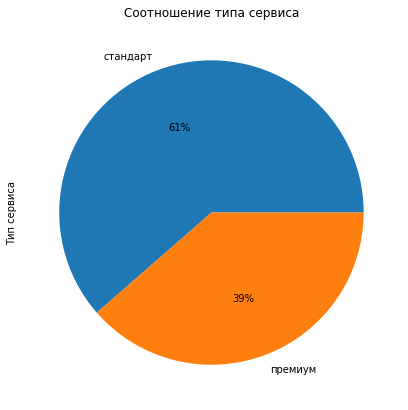

In [128]:
customer_segment['type_of_service'].value_counts().plot(
    kind = 'pie',
    figsize = (7, 7),
    autopct = '%0.f%%',
    title = 'Соотношение типа сервиса'
)
plt.ylabel('Тип сервиса');

Больше половины пользователей имеют стандартную подписку.

### Вывод

Всего мы имеем 70 клиентов с большим риском потери активности и которые имеют большой показатель прибыли. Большиснтво из них согласны получать рассылку, имеют стандартную подписку.

5 человек из 70 имеют самую высокую прибыль и самый высокий шанс снижения активности. Двое из них имеют подписку типа "премиум", интересуются категориями "Косметика и аксессуары" и не против получать сообщения. Для них можно использовать премиальные скидки и предложения в данной категории. Остальным можно предложить предложить премиальную подписку или скидки в следующих категориях:
- Товары для детей
- Косметика и аксессуры

Стоит ввести всплывающие окна с рекламой акций в популярных для данного сегмента категориях, потому как малая часть отказалась от рассылки. Топ 5 популярных категорий, согласно графику:
1. Товары для детей
2. Косметика и аксессуары
3. Кухонная посуда
4. Домашний текстиль
5. Техника для красоты и здоровья

Также стоит провести рассылку с акциями и скидочными предложениями. Предлагать премиум подписку клиентам с малым показателем прибыли считаю нецелесообразным. Лучше ввести предложение, что при накоплении определенной потраченой суммы, получить скидку и премиальную подписку со сроком на 2-3 месяца.

## Общий вывод

Перед работой с данными были изучены и описаны предоставленные таблицы:
 - С данными о поведении покупателя на сайте - `market_file.csv`
 - С выручкой от каждого покупателя - `market_money.csv`
 - С временем, которое покупатели провели на сайте - `market_time.csv`
 - О среднемесячной прибыли покупателя за последние 3 месяца - `money.csv`
 
При рассмотрении таблиц пропусков не обнаружено, рассмотрены графики с распределением данных в каждом столбце, обнаружены столбцы с несоотвестсвующим типом данных и некоторые аномалии.

**Несоотвестсвие типа данных наблюдалось у следующих столбцов:**
- Таблица `shopper_info`:
 - Перевести в числовой
   - Маркет_актив_6_мес
   - Акционные_покупки
 - Перевести в категориальный
   - Маркет_актив_тек_мес:
     1. Меньше 4
     2. Больше 4
- Таблица `revenue_info`:
 - Перевести в числовой
   - Выручка

**Аномалии, подтвердившиеся на исследовательском этапе:**

Замечены максимальные значения, значение которых сильно превышает цифры на остальных квартилях:
- Длительность(1079) - на графике значений от 1000 довольно много, поэтому оно не является аномалией или ошибкой ввода

**На этапе предобработки** заголовки переведены в змеиный регистр, изменен тип данных у указанных выше столбцов. При поиске дубликатов явные дубликаты отсутствовали. Неявные дубликаты обнаружены у следующих таблиц:
- `shopper_info`
 - столбец `type_of_service` - 'стандартт' заменен на 'стандарт'
- `time_info`
 - столбец `period` - 'предыдцщий_месяц' заменен на 'предыдущий_месяц'
 
**На исследовательском этапе** были в отдельности рассмотрены категориальные и количественные признаки. По итогу исследования
- 62% пользователей сохраняют активность на сайте. Обнаружен дисбаланс классов в целевой переменной.
- 71% пользователей со стандартной подпиской
- 76% составила категория маркетинговых коммуникай "больше 4"
- 74% пользователей не против получать сообщения от магазина
- Три наиболее популярные категории у пользователей:
 1. Товары для детей
 2. Домашний текстиль
 3. Косметика и красота
- Выручка оказалась равной во всех месяцах
- Покупатели проводят одинаковое время на сайте в каждом месяце

Проведена проверка распределения данных и поиск выбросов. Также были рассмотрены клиенты с активностью не менее 3-х месяцев:
- Общий показатель прибыльности составил 5195.62

Соотношение показателей по типу активности
- Прежний уровень    3204.45
- Снизилась          1991.17

Соотношение показателей по типу подписки
- премиум     1492.27
- стандарт    3703.35

Клиентов с непостоянной покупательской активностью: 4

**На этапе объединения таблиц** был сформирован датасет из таблиц `shopper_info, revenue_info, time_info` для проведения дальнейшего моделирования.

**На этапе корреляционного анализа** была рассмотрена матрица корреляции для обнаружения связи между признаками. Большее влияние на целевой признак customer_activity, по сравнению с остальными показателями, имеют следующие признаки:

- Малое(0.5 - 0.6) - average_view_category, promotional_purchases, market_active_six_months, текущий_месяц_у(минуты в текущем месяце), выручка в препредыдущем месяце.
- Умеренное(0.6 - 0.7) - предыдущий_месяц_у(минуты в предыдущем месяце)
- Заметное(0.7+) - page_visit

Также заметная взаимосвязь наблюдается только у признаков с выручкой за предыдущий и текущий месяц. Данные признаки имели линейную связь - при изменении показателей за предыдущие месяцы, менялся и показатель у текущего. Мультиколлинеарности между признаками не наблюдается, т.к. нет показателей 0.9+.

**При использовании пайплайнов** была использована метрика ROC-AUC, т.к. данная метрика оценивает работу модели независимо от выбранного порога и она лучше всего подойдет для ситуации с дисбалансом классов у целевой переменной. Также для борьбы с дисбалансом был применен встроенный метод "class_weight='balanced'"

Можно выделить следующие этапы:
- разделение датафрейма на выборки с использованием стратификации по целевому признаку, чтобы сохранить соотношение классов
- выделение признаков по способу кодирования
- кодирование целевого признака с помощью LabelEncoder
- создание пайплайнов для обработки данных и применение их через ColumnTransformer
- подбор модели и комбинации признаков для получения лучшего показателя метрики

Лучшей моделью была выбрана модель Логистической регрессии с параметрами (C=2, class_weight='balanced', random_state=42) с методом масштабирования StandardScaler(). 
- значение метрики на тренировочных данных 0.8968
- значение на тестовых данных 0.9174

**Успешно прошла проверку на адекватность. При изучении рейтинга признаков выявлено следующее**

Большее влияение на результат модели оказывают следующие признаки:
- **Склоняют модель отнести объекты к классу 0:**
 - average_view_category_visit(-0.66)
 - page_visit(-0.62)
 - предыдущий_месяц_y(время проведенное на сайте)(-0.59)
 
О стабильном уровне активности покупателя говорит количество просмотренных категорий, количество посещенных страниц и проведенное время на сайте.
 
 
- **Склоняют модель отнести объекты к классу 1:**
 - unpaid_product_stack_quart(+0.55)
 - promotional_purchases(+0.67)

О снижении активности клиентов можно узнать, если в корзине в течении 3-х месяцев лежат неоплаченные покупки и они совершают покупки только по акции.

**При сегментации покупателей** был исследован сегмент клиентов с большим риском потери активности и которые имеют большой показатель прибыли. 
 - высокая выроятность снижения активности - больше или равная 0.6
 - высокий показатель прибыли - больше или равный 5

Большинство имеют стандартную подписку и согласны на рассылку. 

Наиболее популярные категории товаров для данного сегмента:

1. Товары для детей
2. Косметика и аксессуары
3. Кухонная посуда
4. Домашний текстиль
5. Техника для красоты и здоровья

Выявлен образ неактивного покупателя: мало времени проводит на сайте, не интересуется категориями, посещает мало страниц, имеет неоплаченные товары в корзине, совершает покупки только по акции.

Проведено сравнение распределения данных в общей таблице и датасете сегмента. 
Также изучен подсегмент пользователей с максимальными показателями прибыли(больше 6.5) и вероятностями потери активности(от 8.5). Для каждого сегмента описаны предложения по повышению активности.